# Сборный проект. Исследовательский анализ интернет-магазина

## Описание проекта

***
К нам обратился интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например,`Xbox` или `PlayStation`). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
***

**Последовательность действий**
- Шаг 1. Изучение файла с данными.
- Шаг 2. Подготовка данных. Задачи:
  - Заменим названия столбцов (приведите к нижнему регистру);
  - Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему;
  - Обработаем пропуски при необходимости:
    - Объясним, почему заполнили пропуски определённым образом или почему не стали это делать;
    - Опишем причины, которые могли привести к пропускам;
  - Изучим аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберем это значение и опишем, как его обработать;
  - Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.
- Шаг 3. Исследовательский анализ данных.
  - Посмотрим, сколько игр выпускалось в разные годы.
  - Посмотрим, как менялись продажи по платформам. Выберим платформы с наибольшими суммарными продажами и постройте распределение по годам.
  - Возьмем данные за соответствующий `актуальный период` в соответствии с исследованиями первых двух пунктов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
  - Далее не будем учитывать в работе данные за предыдущие годы.
  - Определим какие платформы лидируют по продажам, растут или падают.
  - Выберим несколько потенциально прибыльных платформ.
  - Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
  - Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.
  - Соотнесем выводы с продажами игр на других платформах.
  - Посмотрим на общее распределение игр по жанрам.
- Шаг 4. Составим портрет пользователя каждого региона.
  - Определим для пользователя каждого региона (`NA`, `EU`, `JP`):
    - Самые популярные платформы (топ-5). Опишем различия в долях продаж.
    - Самые популярные жанры (топ-5). Поясним разницу.
    - Ответим на вовпрос: Влияет ли рейтинг ESRB на продажи в отдельном регионе?
- Шаг 5. Проверка гипотез.
  - Сформулируем нулевую и альтернативную гипотезы;
  - Определим критерий для проверки гипотез и почему.
- Шаг 6. Общий вывод.
***
**Описание данных**
- `Name` — название игры;
- `Platform` — платформа;
- `Year_of_Release` — год выпуска;
- `Genre` — жанр игры;
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий);
- `EU_sales` — продажи в Европе (миллионы проданных копий);
- `JP_sales` — продажи в Японии (миллионы проданных копий);
- `Other_sales` — продажи в других странах (миллионы проданных копий);
- `Critic_Score` — оценка критиков (максимум 100);
- `User_Score` — оценка пользователей (максимум 10);
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Шаг 1. Изучение файла с данными

In [1]:
# импортируем необходимые библиотеки для анализа
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

# увеличим максимальное количество отображающихся колнок
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# откроем полученный датасет
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('drive/MyDrive/datasets_YaP/games.csv')

In [3]:
# выведим dataset для просмотра head и tail
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


## Шаг 2. Подготовка данных

### Изучение таблицы

In [4]:
# получим информацию по полученной таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В информации полученной из таблицы наблюдаются следующие проблемы, которые необходимо устранить:
- наличие пропусков в колонках `Year_of_Release`, `Name`, `Genre`, `Critic_Score`, `User_Score`, `Rating`;
- некорректное наименование колонок таблицы;
- некорректный тип данных в колонках `Year_of_Release` и `User_Score`.

In [5]:
# выведим уникальные значения колонки 'Rating'
data['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В колонке `Rating` присутствуют неявные дубликаты рейтингов, такие как `E` и `K-A`. Рейтинг `K-A` является устаревшим и проставлялся для взрослых детей от 6 лет, в последующем был переименован на рейтинг `E`.

In [6]:
# выведим уникальные значения колонки 'User_Score'
data['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В колонке `User_Score` присутсвует значени `"tbd"`, что означает - рейтинг еще не определен. Следовательно данные позиции можно заменить на `NaN`.

In [7]:
# посчитаем сумму неявных дубликатов в колонке 'Name'
data['Name'].duplicated().sum()

5155

В колонке присутсвуют 5155 дубликатов, для подробного анализа необходимо вывести позиции в которых имеются дубликаты.

In [8]:
# посчитаем сумму явных дубликатов
data.duplicated().sum()

0

In [9]:
# изучим количество дубликатов по наименованию игр
data['Name'].value_counts()

Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: Name, Length: 11559, dtype: int64

В колонке `Name` присутствуют дубликаты. Данные дубликаты могут обусловлены, что игра продается на разные платформы, в разных регионах. Дубликаты предлагаю не удалять, так как могут повлиять на правильно анализа.

<b>Подитог:</b>
По полученной информации таблицы для последующего анализа необходимо выполнить предобработку данных по следующим пунктам:

- привести наименование колонок нижнему регистру для корректного отображения и работы;
- выполнить замену пропусков в колонках:
  - `Year_of_Release`;
  - `Name`;
  - `Genre`;
  - `Rating`;
- привести к корректному типу данных колонки:
  - `Year_of_Release` необходимо привести к типу `int`;
  - `User_Score` необходимо привести к типу `float`;
- выполнить обработку неявных дубликатов в колонке `Rating`, а именно все рейтинги `"K-A"` привести к рейтингу `"E"`.
- в колонке `User_Score` значение `"tbd"` привести к значению `NaN` с последующим заполнением корректных данных.
- в колонке `Name` имеются дубликаты по названию игр. Данные дубликаты можно обосновать тем, что игры продаются на разные платформы, также в датасете присутствуют регионы продаж, для каждого региона также игра может повторяться. Дубликаты предлагается не удалять из датасета.

### Обработка наименований колонок

In [10]:
# выполняем переименование колонок (приводим к нижнему регистру все наименования колонок)
data.columns = data.columns.str.lower()

In [11]:
# выполняем проверку корректности наименования колонок
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Наименование колонок скорректировано и полностью устраивает.

### Обработка колонок `user_score` и `rating`

В колонке `user_score` при изучении было выявлено значение `tbd`.
Данная аббревиатура обозначает, что рейтинг на данный момент времени еще не опредлен. Следовательно, можно сделать вывод, что у игры рейтинг отсутвует и данную аббревиатуру можно привезти к значению `NaN`.

In [12]:
# создаем функцию для замены значения 'tbd' на NaN
def replace_tbd_user_scores(tbd_user_scores, nan_user_score):
    data['user_score'] = data['user_score'].replace(tbd_user_scores, nan_user_score)
replace_tbd_user_scores('tbd', np.NaN)

In [13]:
# выполняем проверку замены в колонке 'user_score'
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Значение `"tbd"` в колонке `user_score` скорректировано и полностью удовлетворяет.

В колонке `rating'` были выявлены неявные дубликаты, такие `"K-A"` и `"E"`. Рейтинг `"K-A"` является первой версией, который в последующем переименовали на рейтинг `"E"`, по факту данные рейтинги имеют один и тот же характер - для взрослых детей от 6 лет.
Для последующего корректного анализа переименуем рейтинг `"K-A"` в `"E"`.

In [14]:
# создаем функцию для замены значения 'K-A' на 'E'
def replace_old_rating(old_rating, new_rating):
    data['rating'] = data['rating'].replace(old_rating, new_rating)
replace_old_rating('K-A', 'E')

In [15]:
# выполняем проверку замены в колонке 'rating'
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

Данные по колонке скорректированы и полностью удовлетворяют нас.

### Удаление пропусков

In [16]:
# посчитаем количество пропусков по каждой колонке таблицы
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

В таблице имеются пропуски в 5 колонках:
- `name` - если в данной колонке отсутствует значение, можно сделать вывод, что игра не имеет название. Данные позиции из таблицы можно удалить, так как на всю колонку с отсутствуют только у двух позиций название игры;
- `genre` - если в данной колонке отсутствует значение, можно сделать вывод, что не определен жанр игры. Одна из причин может быть так же с отсутствием названием игры. Для проверки можно отфильтровать таблицу по условию - "жанр" не содержит данных. Также данные позиции можно удалить из таблицы, так как на всю таблицу всего две позиции;
- `year_of_release` - в колонке отсвуют значения может быть по причине того, что неизвестен год выпуска или данные забыли заполнить. Данные позиции можно удалить из таблицы для последующего корректного анализа;
- `critic_score` - отсутствие значений в данной колонке может означать, что данные игры не оценивали критики. Данные позиции не стоит заполнять, так как они могут привести к неверному анализу.
- `user_score` - отсутствие значений также как и в колонке `critic_score` может означать, что пользователи не оценивали данные игры. Данные позиции не стоит заполнять, так как они могут привести к неверному анализу.
- `rating` - в данной колонке могут отсутствуют значения могут быть по двум причинам:
  - игры не проходили проверку для определения категории рейтинга;
  - игры не имеют никаких значений.
  
  Следовательно рейтинг без дополнительной информации об игре мы не сможем определить, по этому значения NaN можно заменить на значение "не определен".

In [17]:
# выведим позиции с пустыми значениями жанра
data[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Отсутствие значений в колонках `name` и `genre` находятся в одних и тех же позициях. Данные можно удалить из таблицы.

In [18]:
# удалим позиции с пустыми значениями по колонкам 'genre', 'name' и 'year_of_release'
data.dropna(subset = ['name', 'genre', 'year_of_release'], inplace=True)

In [19]:
# заменим пропуски в колонке 'rating' на значение "не определен"
data['rating'] = data['rating'].fillna('не определен')

In [20]:
# проверим обработку пропусков в таблице
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

Пропуски в колонках обработаны, кроме колонок `user_score` и `critic_score`. Данные колонке не обрабатываются, так как могут повлиять на правильность последующего анализа. Обработка выполнена успешно.

### Изменение типов данных

In [21]:
# выполняем преведение колонок 'yeat_of_release' и 'user_score' к правильным типам
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data['year_of_release'] = data['year_of_release'].astype('int')

Выполнена замена типов данных в следующих колонках:
- `year_of_release` - изначально тип в колонке был float. Года исчисляются в челочисленных значениях, плавающей запятой у значения года не может быть. Привели значение колонок к типу `int`.
- `user_score` - колонка для хранения значений оценок пользователей по играм. Оценка является средним значением по всем оценкам от пользователей, по этому значение может быть дробным, следовательно необходимо колонку привести к типу `float`.

In [22]:
# выведим информацию по таблице для проверки изменененных типов
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


В таблице устранены выявленные недочеты:
- наименования колонок выглядят корректно;
- устранены пропуски в обозначенных колонках;
- типы данных корректно изменены для последующего анализа.

### Подсчет и добавление новых столбцов

Необходимо выполнить рассчет суммарных продаж во всех регионах и записать в новой колонку `sum_sales_regions`.

In [23]:
# выполним рассчет суммарных продаж по регионам
data['sum_sales_regions'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [24]:
# выдем таблицу и проверим добавление новой колонки
data.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales_regions
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,не определен,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,не определен,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,не определен,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,не определен,28.31


In [25]:
# дополнительно выведим информацию о датасете, после обработки
temp = data.copy()
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               16444 non-null  object 
 1   platform           16444 non-null  object 
 2   year_of_release    16444 non-null  int64  
 3   genre              16444 non-null  object 
 4   na_sales           16444 non-null  float64
 5   eu_sales           16444 non-null  float64
 6   jp_sales           16444 non-null  float64
 7   other_sales        16444 non-null  float64
 8   critic_score       7983 non-null   float64
 9   user_score         7463 non-null   float64
 10  rating             16444 non-null  object 
 11  sum_sales_regions  16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shi

<b>Итог:</b>

Выполнено изучение информации по таблице. По изученной информации были выполнены следующие действия:
- метод `.info()` предоставил нам информацию о таблице в целом - наименование колонок, наличие пропусков, типы данных в колонках:
  - использовали метод `.str_lower()` для приведения наименования колонок к нижнему регистру. Наименования колонок после преобразования имеют корректный вид для последующей работы.
  - изучили уникальные значения в колонка `user_score` и `rating`. В колонке `user_score` помимо пропусков `NaN` наблюдалась аббревиатура `"tbd"` (to be determined), которая обозначает что оценка пользователей на данный момент еще не определено. Было принято решение данную аббревиатуру заменить на значение `NaN`, так как колонка имела типа `object`. В колонке `rating` были выявлены неявные дубликаты - рейтингы `"K-A"` и `"E"`. В свою очередь рейтинги имеют общее назначение в разный период времени: `"K-A"` до 1998 года, далее игры данной возрастного ограничения были определены под рейтингом `"E"`. Было принято решение рейтинг `"K-A"` привести к единообразию и переимновать, как рейтинг `"E"`.
- далее по полученной информации были проведена работа по удалению пропусков в следующих колонках:
  - `name` - колонка содержит название игр, заполнить пустые значения какими-либо данными не представляется возможности, следовательно данные позиции для последующего корректного анализа было решено удалить из таблицы;
  - `genre` - данные в колонке отсутствовали также у позиций, которые имели пустые значения в колонке `name`. Без наименования и какой-либо дополнительной информации жанр игры определить тяжело, по этому было принято решение также данные позиции удалить из таблицы, а именно при удалении позиции по колонке `name`;
  - `year_of_release` - в колонке отсвуют значения может быть по причине того, что неизвестен год выпуска или данные забыли заполнить. Данные позиции можно удалить из таблицы для последующего корректного анализа;
  - `critic_score` - отсутствие значений в данной колонке может означать, что данные игры не оценивали критики. Для корректного анализа данные не заполням - оставляем со значением `NaN`.
  - `user_score` - отсутствие значений также как и в колонке `critic_score` может означать, что пользователи не оценивали данные игры. Для корректного анализа данные не заполням - оставляем со значением `NaN`.
  - `rating` - в данной колонке могут отсутствуют значения могут быть по двум причинам:
    - игры не проходили проверку для определения категории рейтинга;
    - игры не имеют никаких значений.
    
    Следовательно рейтинг без дополнительной информации об игре мы не сможем определить, по этому значения NaN можно заменить на значение "не определен".
- изменены типы данных в колонках `year_of_realese` и `user_score`.
- добавлена колонка `sum_sales_regions` с суммой продаж по регионам по каждой игре.

## Шаг 3. Исследовательский анализ данных

***
**Задача #1.** Необходимо выполнить рассчет количества выпускаемых игр в разные года и определеить важность данных для последующего анализа по всем предоставленным периодам в таблице.
***

Для выполнения анализа по предоставленным периодам создадим сводую таблицу по колонке `year_of_release` с агрегирующей функцией `.count()`. Таким образом получим данные по количеству выпускаемых игр в разные периоды времени.

In [26]:
# создадим сводную таблицу по колонкам 'year_of_realese'
pivot_year_of_realese = data.pivot_table(index='year_of_release', values='name', aggfunc=['count'])
pivot_year_of_realese.columns = ['_'.join(col).strip() for col in pivot_year_of_realese.columns.values]
pivot_year_of_realese

,count_name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Построим график по сводной таблице для понимания как изменялось количество выпускаемых игр на предоставляемых периодах времени. По графику необходимо определить важность изучаемых периодов и определить какой период лучшего всего взять для анализа.

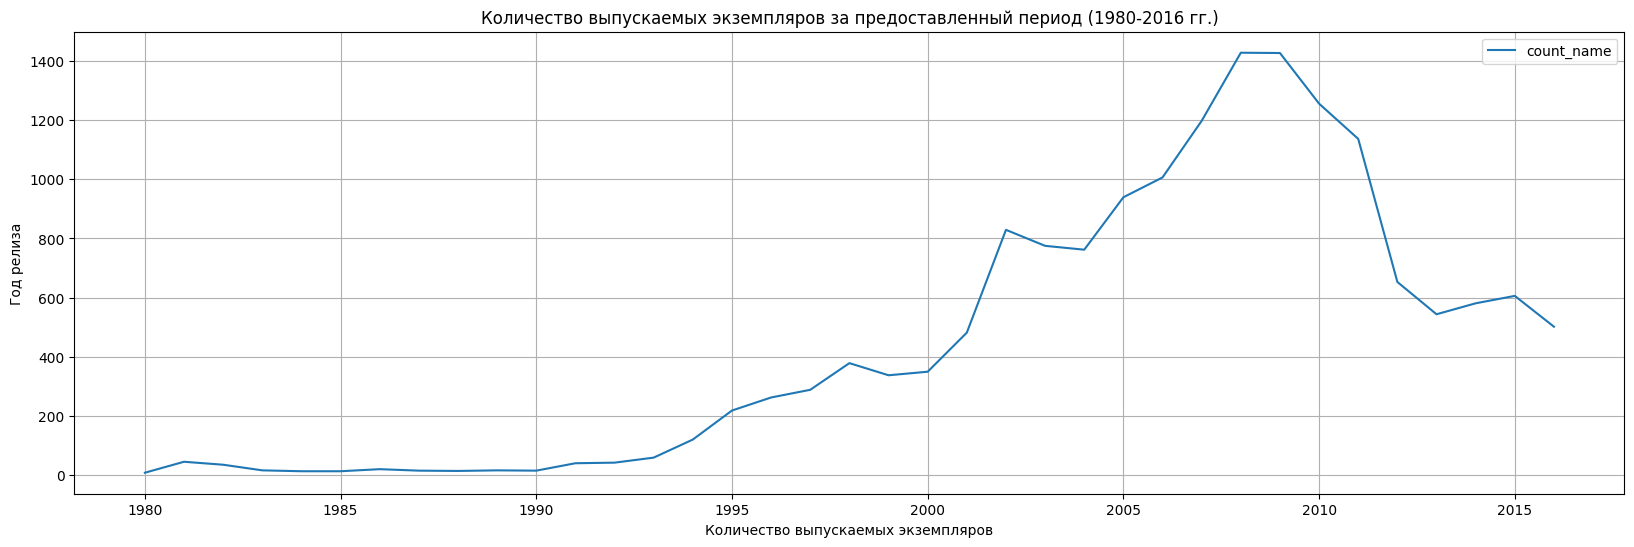

In [27]:
# построим график для отслеживания зависимисоти
pivot_year_of_realese.plot(y='count_name', grid=True, figsize=(20, 6), title='Количество выпускаемых экземпляров за предоставленный период (1980-2016 гг.)');
plt.xlabel('Количество выпускаемых экземпляров');
plt.ylabel('Год релиза');
plt.xticks(rotation=0);
plt.show()

По графику сделаем промежуточный **вывод**:
- с 1980 по 1990 года наблюдается линия практически у нуля. Это можно объяснить малым количеством платформ, на которые можно выпускать игры.
- с 1990 по 2015 года наблюдается постоянный рост выпускаемых игр. Это объясняется тем, что выпускаются новые платформы игры, на которые можно выпускать игры разных жанров.
- с 2014 по 2016 года наблюдалось увеличение и после плавный спад выпускаемых игр, может быть обусловлено устаревание и неактуальностью платформ на которые выпускались игры.

**Для последующего анализа возьмем период с 2014 по 2016 для корректного расчета кампании на 2017 год.**

Для более наглядного представления по продажам в разные периоды времени создадим сводную таблицу по колонками `year_of_release` и `platform`. В результате получим сгруппированные данные по платформа и увидим более детальную информацию по количеству продаваемых игр в определенной период и по определенной платформе.

In [28]:
# создадим сводную таблицу по колонкам 'year_of_realese' и 'platform'
pivot_realese_for_platform = data.pivot_table(index='year_of_release', columns='platform', values='name', aggfunc=['count'])
pivot_realese_for_platform.columns = ['_'.join(col).strip() for col in pivot_realese_for_platform.columns.values]

In [29]:
# выведим сводную таблицу
pivot_realese_for_platform

,count_2600,count_3DO,count_3DS,count_DC,count_DS,count_GB,count_GBA,count_GC,count_GEN,count_GG,count_N64,count_NES,count_NG,count_PC,count_PCFX,count_PS,count_PS2,count_PS3,count_PS4,count_PSP,count_PSV,count_SAT,count_SCD,count_SNES,count_TG16,count_WS,count_Wii,count_WiiU,count_X360,count_XB,count_XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,11.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Отсортиртируем полученные данные по позициям с 2014 по 2016 год.

In [30]:
# отфильтруем dataset по колонке 'year_of_release' с 2015 по 2016 год
data_for_analysis = data.query('2014 <= year_of_release <= 2016')

***
**Задача #2.** Необходимо изучить, как менялись продажи по платформам, и выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. Дополтельно просмотреть за какой характерный срок появляются новые и исчезают старые платформы?

По полученным данным выделим платформы, которые лидируют по продажам.
***

In [31]:
# cсоздадим сводную таблицу
pivot_analysis = data_for_analysis.pivot_table(index='platform', columns = 'year_of_release', values='sum_sales_regions', aggfunc='sum')
pivot_analysis.columns = ['2014', '2015', '2016']

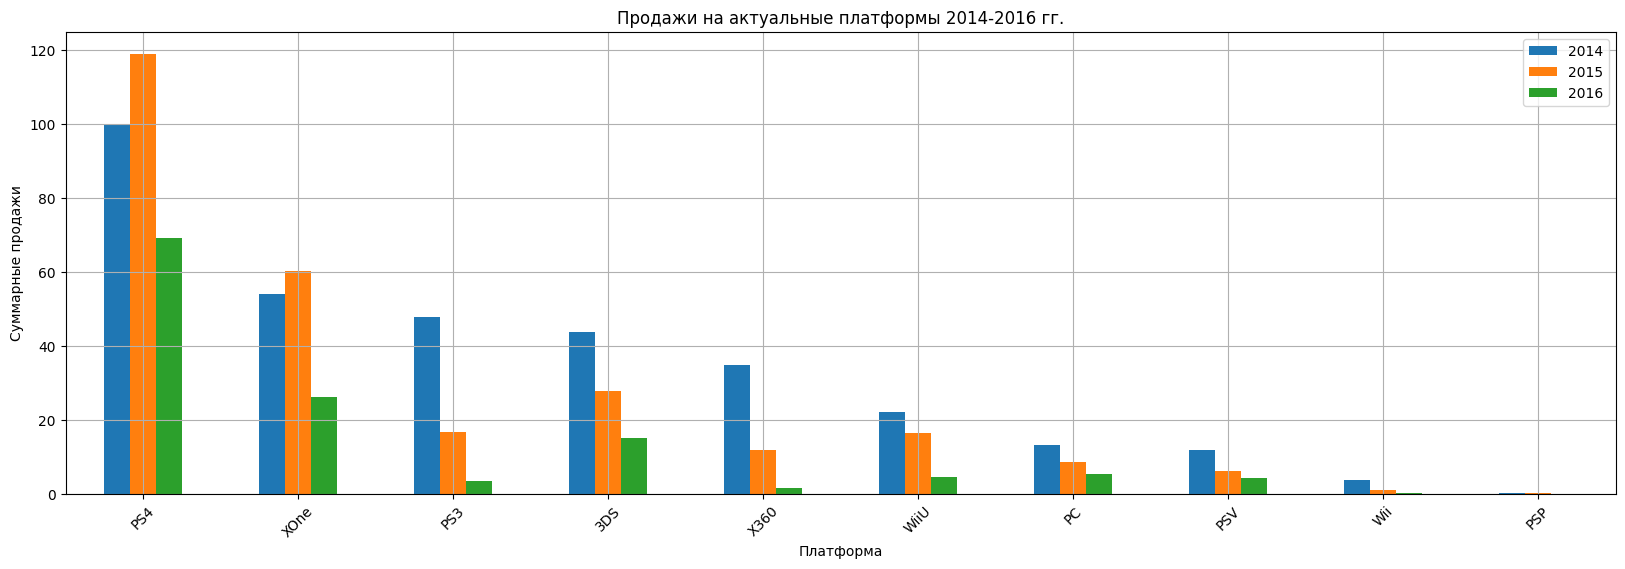

In [32]:
# выведем график по продажам на актуальные платформы с 2014 по 2016 год
pivot_analysis.sort_values(by=['2014', '2015', '2016'], ascending=False).plot(kind="bar", grid=True, figsize=(20, 6), title='Продажи на актуальные платформы 2014-2016 гг.');
plt.xlabel('Платформа');
plt.ylabel('Суммарные продажи');
plt.xticks(rotation=45);
plt.show()

По графику можно наблюдать спад продаж по всем платформам. Среди представленных плафторм выделяются 2 платформы, которые остаются в положительном диапазоне по продажам - это платформы `XOne` (Xbox One), `PS4` (PlayStation 4). `3DS`(Nintendo 3DS) также находится в положительном диапазоне и наиболее стабильна в продажах, ее продажи на протяжении годы имеют небольшую разницу. Остальные близки или стремятся к нулевому значению.

Для последующего анализа необходимо сформировать таблицу с подсчетом общих продаж по регионам и проанализировать плафтормы детальнее.

In [33]:
# сформируем таблицу общих продаж по регионам
group_analysis_regions = data_for_analysis.groupby(['platform'])[['na_sales',
                                                                  'eu_sales',
                                                                  'jp_sales',
                                                                  'other_sales',
                                                                  'sum_sales_regions']].sum().reset_index()
group_analysis_regions = group_analysis_regions.sort_values(by='sum_sales_regions', ascending=False)
group_analysis_regions

,platform,na_sales,eu_sales,jp_sales,other_sales,sum_sales_regions
3,PS4,98.61,130.04,15.02,44.48,288.15
9,XOne,81.27,46.25,0.32,12.52,140.36
0,3DS,22.64,16.12,44.24,3.68,86.68
2,PS3,22.05,25.54,11.22,9.37,68.18
8,X360,28.30,15.49,0.08,4.35,48.22
7,WiiU,19.36,13.15,7.31,3.16,42.98
1,PC,7.23,17.97,0.00,1.85,27.05
5,PSV,2.52,3.53,14.54,1.81,22.40
6,Wii,2.08,2.59,0.00,0.40,5.07
4,PSP,0.00,0.00,0.36,0.00,0.36


Сгруппированная таблица по суммарным продажам подтверждает отображение данных по графику. Наибольшие продажи игры принадлежат играм для платформ `Xbox One`, `PlayStation 4`, `Nintendo 3DS`. Все остальные позиции по количеству и сумме продаж по регионам стремятся к нулевому значению.

Новые модели игровых плафторм появлялись с регулярностью в `1 год`. При этом само исчезновение старых моделей так же было постепенно, относительно их появления.

***
**Задача #3.** Изучим какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
***

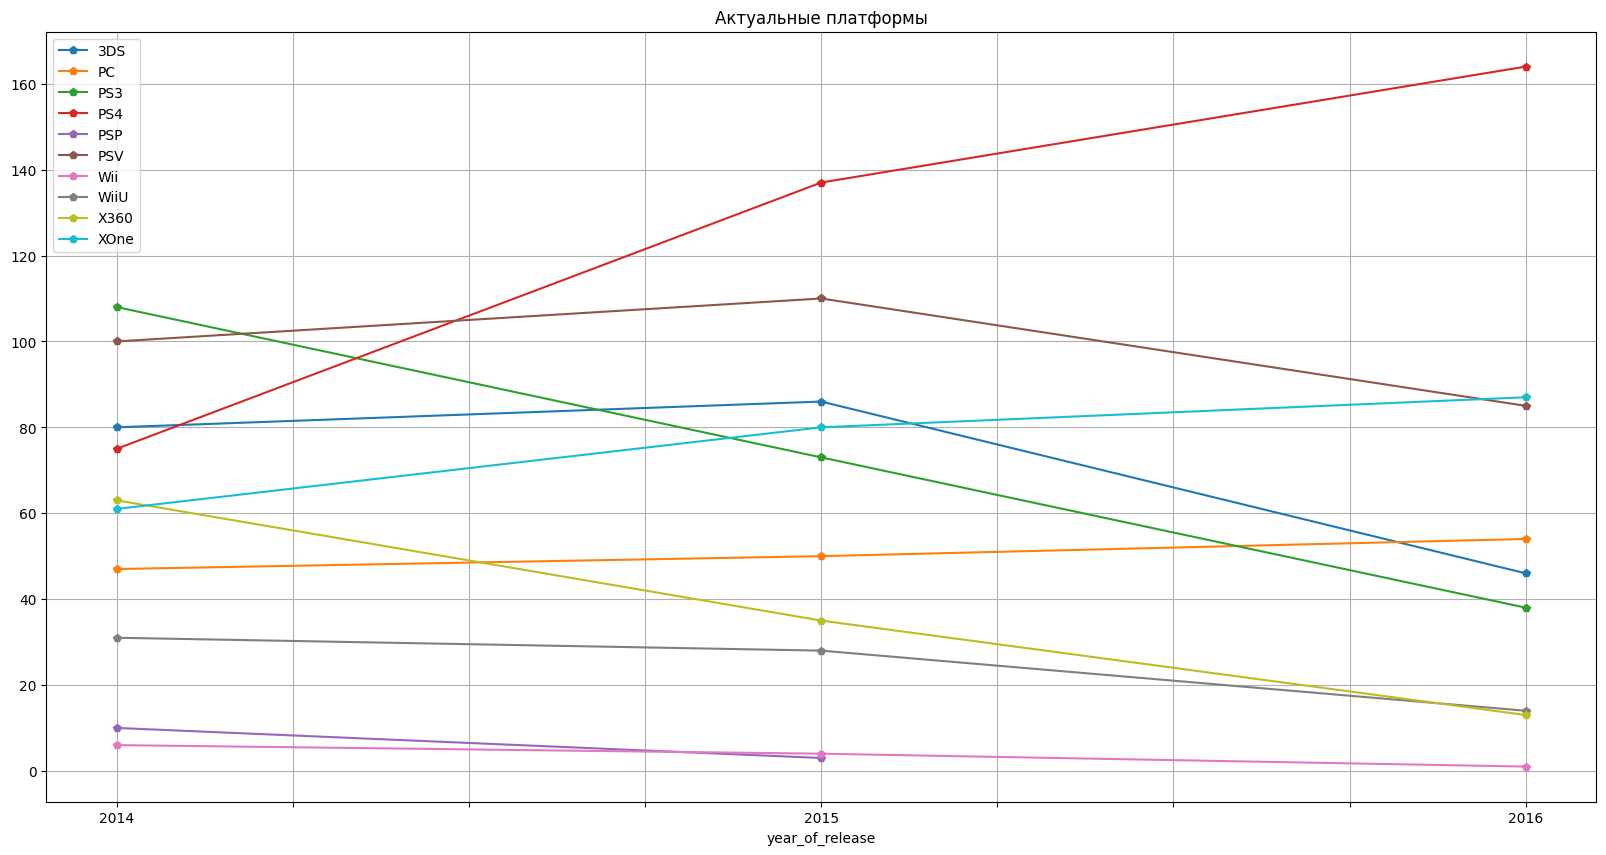

In [34]:
# создадим график продаж по платформам в разных регионах по новой сводной таблице
data_leader = data_for_analysis.pivot_table(
    index='year_of_release',
    columns='platform',
    values='sum_sales_regions',
    aggfunc='count').reset_index()
data_leader.columns = [''.join(col).strip() for col in data_leader.columns.values]
data_leader['year_of_release'] = data_leader['year_of_release'].astype('str')

# выведем график по сводной таблице
data_leader.plot(x='year_of_release', linestyle='-', marker='p',
                 grid=True, figsize=(20, 10), title='Актуальные платформы');

In [35]:
# выведем сводную таблицу
data_leader

,year_of_release,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
0,2014,80.0,47.0,108.0,75.0,10.0,100.0,6.0,31.0,63.0,61.0
1,2015,86.0,50.0,73.0,137.0,3.0,110.0,4.0,28.0,35.0,80.0
2,2016,46.0,54.0,38.0,164.0,NaN,85.0,1.0,14.0,13.0,87.0


По сводной таблице и графику можно сделать следующий вывод:
- крепким и уверенным лидером является платформа `PS4`. Количество продаж на данную платформу в течении актуального периода всегда росло.
- постоянный рост продаж также наблюдается и у платформы `XOne`, но в отличии от `PS4` количество продаж почти в 1.5 раза меньше.
- наиболее стабильной по данному графику является платформа `PC`, продаже по данной плафторме не велики, но плавны и стабильны.
- самый сильный спад за актуальный период наблюдается у платформы `PS3` и `X360`, на протяжении всего периода продажи только падают, это может быть связано с выходом новых консолей `PS4` и `XOne`, у которых в свою очередь продажи растут.
- по остальным позициям наблюдается рост к `2015` году и спад к `2016` году.
- платформа `PSP` в период с `2015` по `2016` не получала никаких продаж.

In [36]:
# выведим датасет для анализа
data_for_analysis

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales_regions
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,не определен,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,не определен,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,не определен,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,не определен,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,не определен,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,не определен,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,не определен,0.01


***
**Задача #4.** Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.
***

In [37]:
# выведим характерные значения для колонки 'platform'
data_for_analysis.groupby('platform')['sum_sales_regions'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


По среднему значению и медианному (2ой квартиль) можно наблюдать, что среднее значение больше медианного, что может говорить о наличии несколько выскоих значений, которые выбиваются из общего списка продажа по платформа. Выбивающиеся данные необходимо посмотреть на диаграмме размаха.

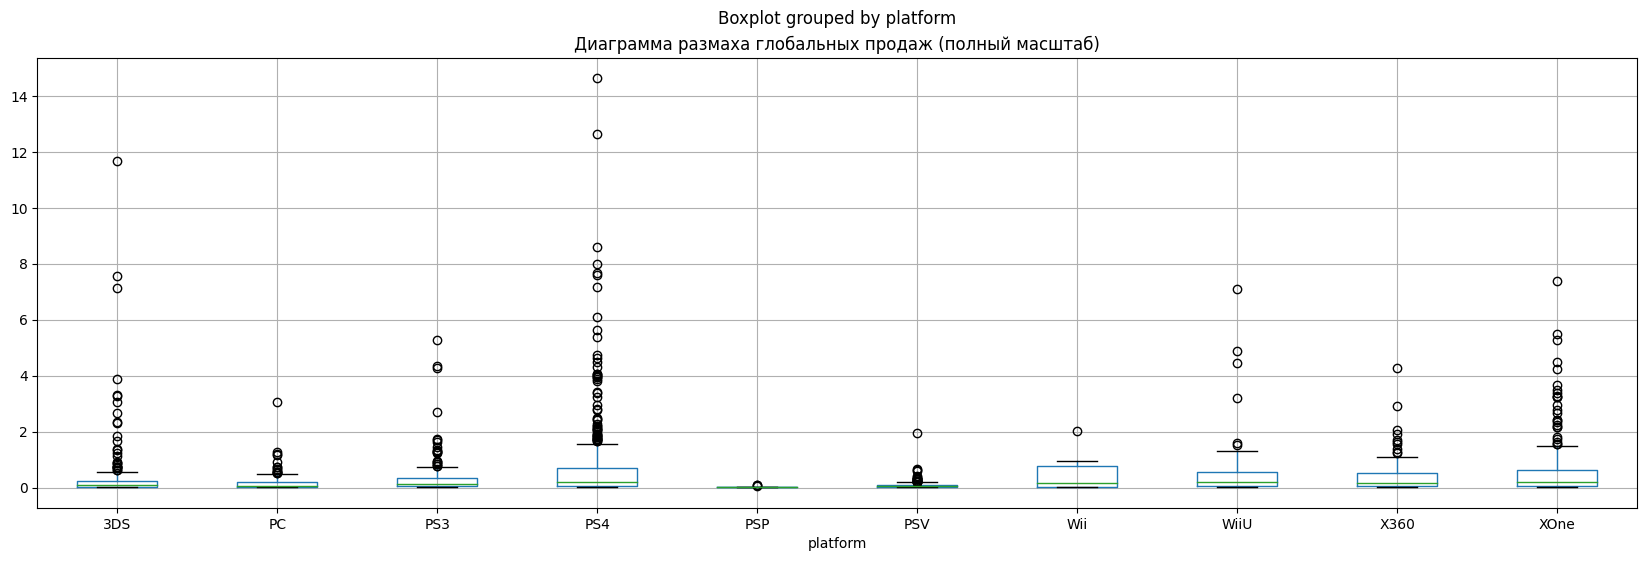

In [38]:
# построим диаграмму размаха на весь диапазон суммарных продаж
data_for_analysis.boxplot(column=['sum_sales_regions'], by='platform', figsize=(20, 6)).set_title("Диаграмма размаха глобальных продаж (полный масштаб)")
plt.show();

На диаграмме размаха наблюдаются редкие и частые выбросы продаж по следующим платформам:
- `3DS` максимальное значение доходит до `12` млн;
- `PS4` максимальное значение доходит до `15` млн;
- `WiiU` максимальное значение доходит до `7` млн;
- `XOne` максимальное значение доходит до `12` млн.

Данные выбросы могут быть обусловлены долгожданным выходом игры на платформу, в следствии чего данные позиции скупали быстро и много.
Для изучения подробно квартилей и медианных значений уменьшим диапазон размаха до 1.6 млн.

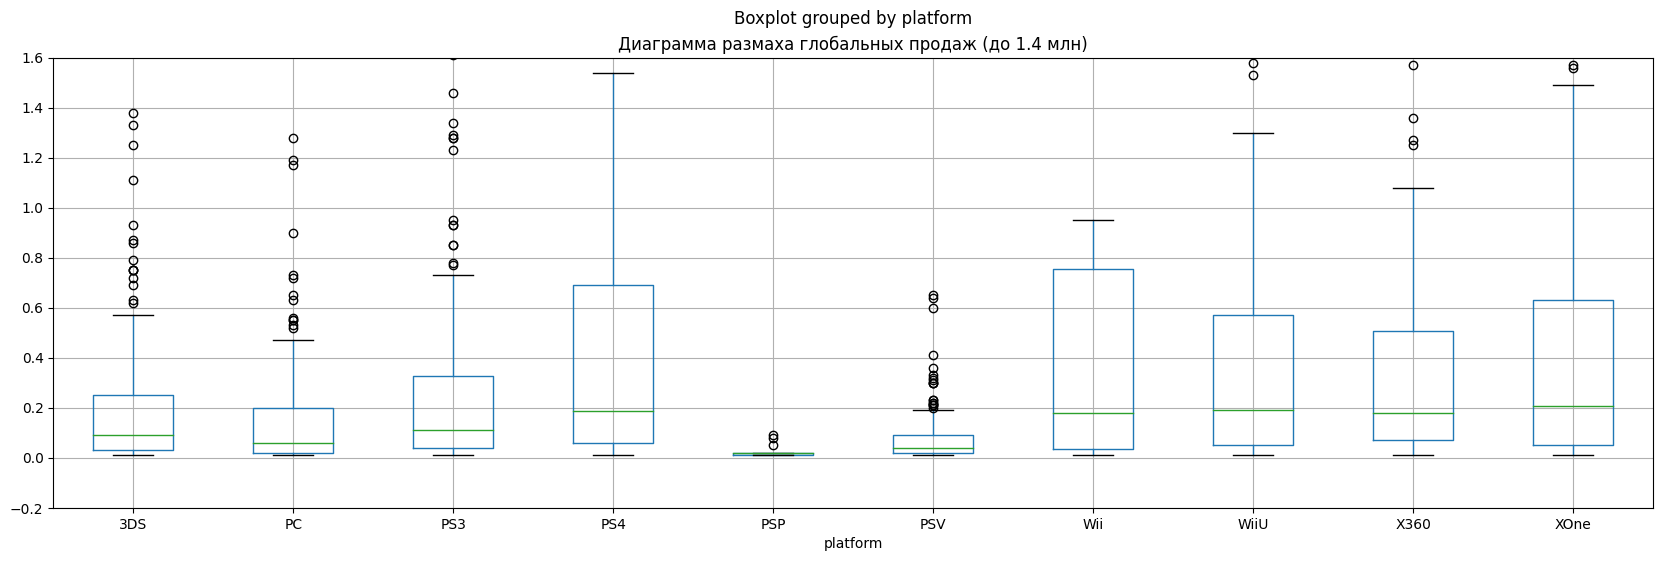

In [39]:
# построим диаграмму размаха на диапазон до 1.4 млн суммарных продаж
data_for_analysis.boxplot(column=['sum_sales_regions'], by='platform', figsize=(20, 6)).set_title("Диаграмма размаха глобальных продаж (до 1.4 млн)")
plt.ylim (-0.2, 1.6)
plt.show()

Можем выделить несколько платформ, которые выделяются: `PS4`, `WiiU`, `X360`,  `Xbox One`. Границы этих платформ высокие, но при всем при этом медиана у всех платформ, т.к. медиана и размах примерно на одном уровне, можно сказать, что у наших платформ, в отличии от тех, которые не попали в выборку есть намного больше игр, которые покупались намного чаще.

In [40]:
# создадим новую таблицу убрав аномальные выбросы
new_data_for_analysis = data_for_analysis[(data_for_analysis['platform'] == 'PS4') & (data_for_analysis['sum_sales_regions'] > 1.5)]
new_data_for_analysis = data_for_analysis[(data_for_analysis['platform'] == 'XOne') & (data_for_analysis['sum_sales_regions'] > 1.5)]
new_data_for_analysis = data_for_analysis[(data_for_analysis['platform'] == 'PC') & (data_for_analysis['sum_sales_regions'] > 0.5)]

In [41]:
# проверим долю исключенных аномальных данных
print('Доля исключенных аномальных значений:', new_data_for_analysis.shape[0] / data_for_analysis.shape[0])

Доля исключенных аномальных значений: 0.008288928359976317


Доля исключенных аномальных значений превышает 10 процентов от анализируемого датасета `data_for_analysis`. Поэтому предлагается данные значения оставить для последующего анализа

***
**Задача #4.** Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.
***

Возьмем для оценки несколько платформ и построим для них график рассеивания, а также посчитаем корреляцию

In [42]:
# создадим список рассматриваемых платформ
top_platform = ['PS4', 'XOne', 'X360', '3DS', 'WiiU']

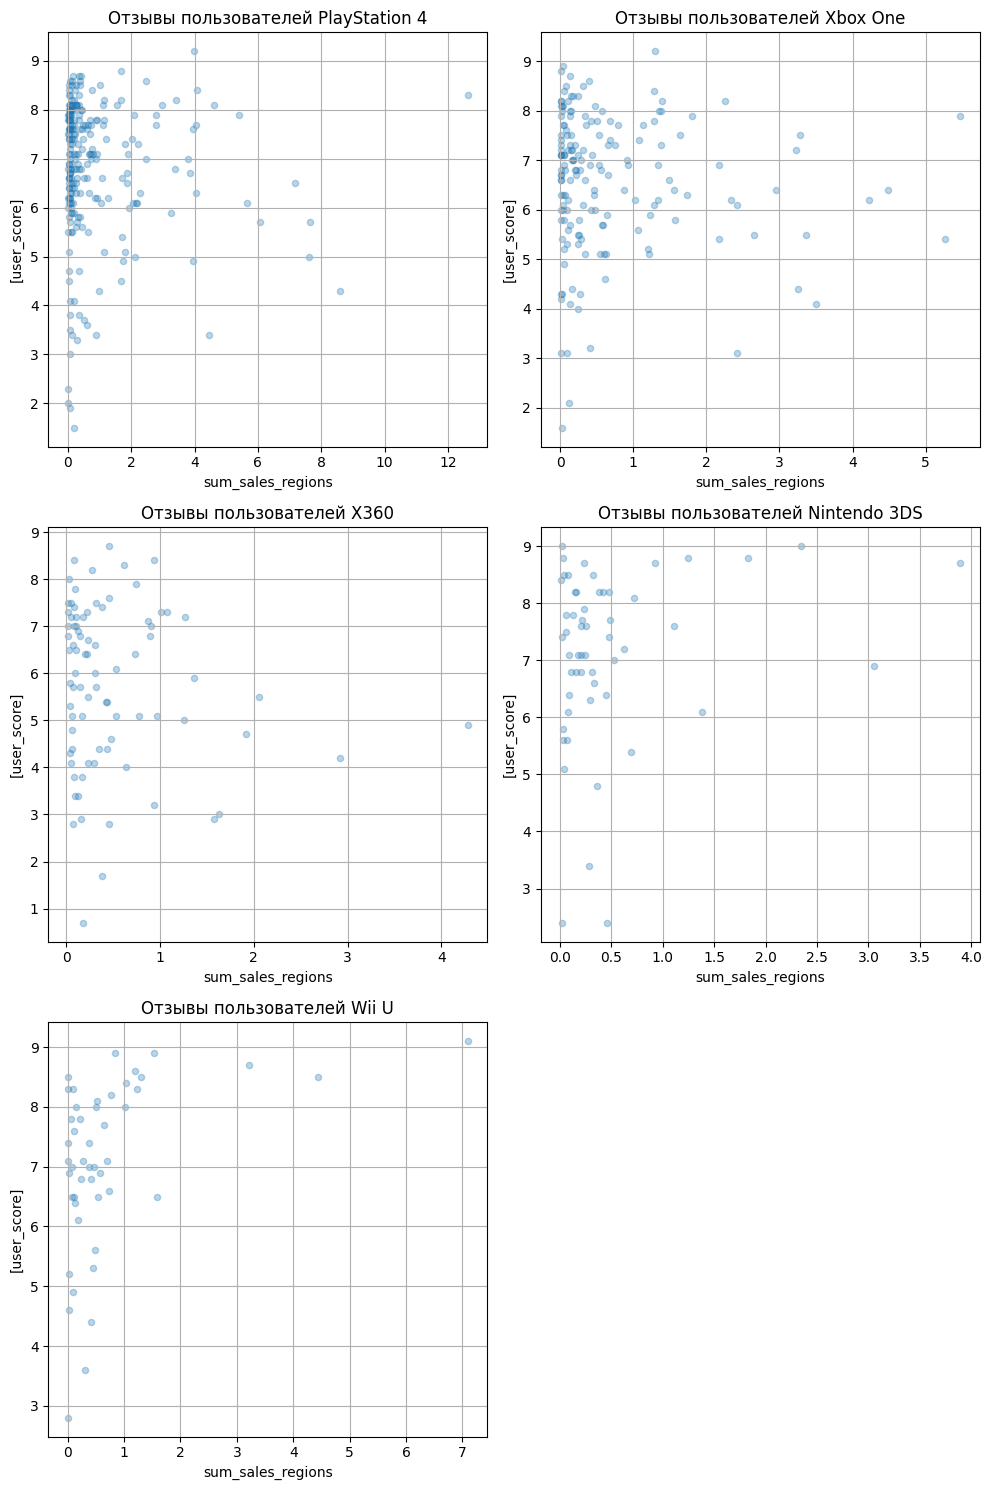

In [43]:
# считаем корреляцию и в зависимости от значения определяем отрицательная или положительная.
fig, axs = plt.subplots(nrows = 3, ncols = 2, figsize=(10, 15))

for index, plat_user in enumerate(top_platform):
    row = index//2
    col = index%2
    data_for_analysis[data_for_analysis['platform']==plat_user].plot(x='sum_sales_regions',
                                                                     y=['user_score'],
                                                                     kind='scatter',
                                                                     alpha=0.3,
                                                                     ax=axs[row, col], grid=True)
    if plat_user == 'PS4':
        axs[row, col].set_title("Отзывы пользователей PlayStation 4")
    elif plat_user == 'XOne':
        axs[row, col].set_title("Отзывы пользователей Xbox One")
    elif plat_user == '3DS':
        axs[row, col].set_title("Отзывы пользователей Nintendo 3DS")
    elif plat_user == 'WiiU':
        axs[row, col].set_title("Отзывы пользователей Wii U")
    else:
        axs[row, col].set_title("Отзывы пользователей X360")

# удалим пустые подграфики, если их количество меньше 6
if len(top_platform) < 6:
    for index in range(len(top_platform), 6):
        fig.delaxes(axs.flatten()[index])

plt.tight_layout()
plt.show()

In [44]:
# считаем корреляцию и в зависимости от значения определяем отрицательная или положительная.
for plat_cor_user_1 in top_platform:
    platform_score = data_for_analysis[data_for_analysis['platform']==plat_cor_user_1]
    platform_score_cor = platform_score['user_score'].corr(platform_score['sum_sales_regions'])

    if plat_cor_user_1 == 'PS4':
        display('Корреляция PS4 слабо отрицательная: {}'.format(platform_score_cor))
    elif plat_cor_user_1 == 'XOne':
        display('Корреляция XOne слабо отрицательная: {}'.format(platform_score_cor))
    elif plat_cor_user_1 == '3DS':
        display('Корреляция 3DS слабо положительная: {}'.format(platform_score_cor))
    elif plat_cor_user_1 == 'WiiU':
        display('Корреляция WiiU слабо положительная: {}'.format(platform_score_cor))
    else:
        display('Корреляция X360 слабо отрицательная: {}'.format(platform_score_cor))

'Корреляция PS4 слабо отрицательная: -0.040131589472697356'

'Корреляция XOne слабо отрицательная: -0.0703839280647581'

'Корреляция X360 слабо отрицательная: -0.138444570945665'

'Корреляция 3DS слабо положительная: 0.2151932718527028'

'Корреляция WiiU слабо положительная: 0.40792645792170773'

In [45]:
# cоздадим цикл для рассчет слабо положительной корреляции
for plat_cor_user_2 in top_platform:
    platform_score = data_for_analysis[data_for_analysis['platform']==plat_cor_user_2]
    platform_without_user = platform_score.dropna(subset=['user_score'])
    platform_score_cor = platform_score['user_score'].corr(platform_score['sum_sales_regions'])

    if plat_cor_user_2 == 'PS4':
        display('Корреляция PS4 слабо отрицательная: {}'.format(platform_score_cor))
    elif plat_cor_user_2 == 'XOne':
        display('Корреляция XOne слабо отрицательная: {}'.format(platform_score_cor))
    elif plat_cor_user_2 == '3DS':
        display('Корреляция 3DS слабо положительная: {}'.format(platform_score_cor))
    elif plat_cor_user_2 == 'WiiU':
        display('Корреляция WiiU слабо положительная: {}'.format(platform_score_cor))
    else:
        display('Корреляция X360 слабо отрицательная: {}'.format(platform_score_cor))

'Корреляция PS4 слабо отрицательная: -0.040131589472697356'

'Корреляция XOne слабо отрицательная: -0.0703839280647581'

'Корреляция X360 слабо отрицательная: -0.138444570945665'

'Корреляция 3DS слабо положительная: 0.2151932718527028'

'Корреляция WiiU слабо положительная: 0.40792645792170773'

По полученным графикам рассеивания и корреляцим зависимости оценок пользователей наблюдаем следующее:
- оценки пользователей в диапазон от 5 до 10, в этом диапазоне преобладают наивысшее оценки.
- корреляция во всех случаях стремится к нулю, из этого можно сделать вывод, что продажи не зависят от оценок пользователей, особенно это наблюдается по играм на платформу PS4.

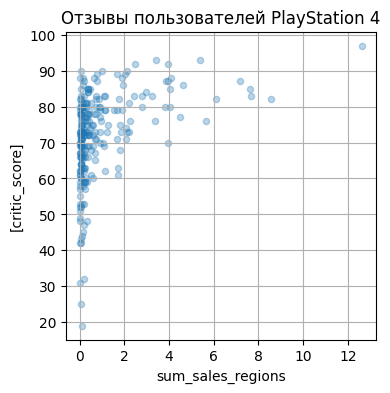

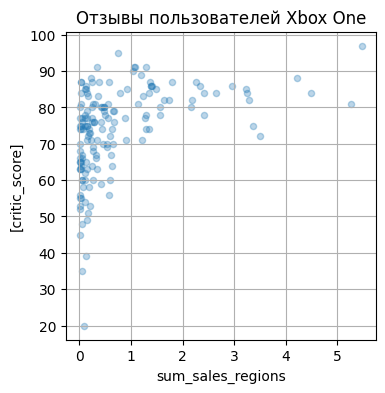

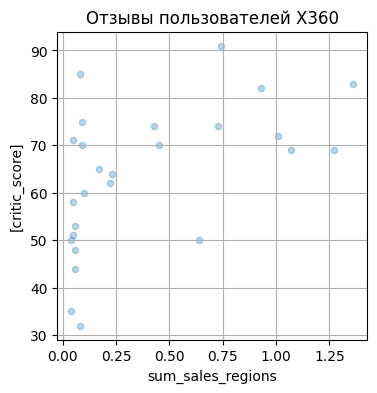

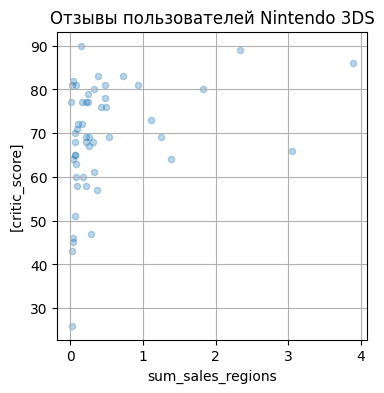

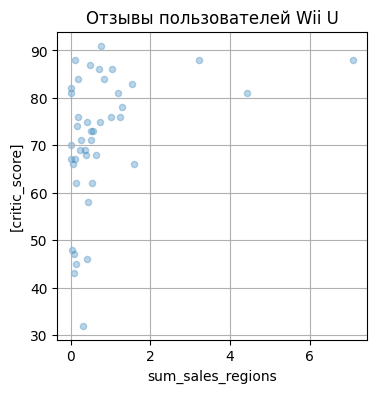

In [46]:
#сформируем цикл для реализации графиков рассеивания по каждой платформе списка с отзывами критикиов
for plat_critic in top_platform:
    data_for_analysis[data_for_analysis['platform']==plat_critic].plot(x='sum_sales_regions', y=['critic_score'], kind='scatter', alpha=0.3, figsize=(4,4), grid=True)
    if plat_critic == 'PS4':
        plt.title("Отзывы пользователей PlayStation 4")
    elif plat_critic == 'XOne':
        plt.title("Отзывы пользователей Xbox One")
    elif plat_critic == '3DS':
        plt.title("Отзывы пользователей Nintendo 3DS")
    elif plat_critic == 'WiiU':
        plt.title("Отзывы пользователей Wii U")
    else:
        plt.title("Отзывы пользователей X360")

In [47]:
#cоздадим цикл для рассчет слабо отрицательной корреляции (критики)
for plat_cor_critic_1 in top_platform:
    platform_score = data_for_analysis[data_for_analysis['platform']==plat_cor_critic_1]
    platform_score_cor = platform_score['critic_score'].corr(platform_score['sum_sales_regions'])
    if plat_cor_critic_1 == 'PS4':
        display('Корреляция PS4 слабо отрицательная: {}'.format(platform_score_cor))
    elif plat_cor_critic_1 == 'XOne':
        display('Корреляция XOne слабо отрицательная: {}'.format(platform_score_cor))
    elif plat_cor_critic_1 == '3DS':
        display('Корреляция 3DS слабо отрицательная: {}'.format(platform_score_cor))
    elif plat_cor_critic_1 == 'WiiU':
        display('Корреляция WiiU слабо отрицательная: {}'.format(platform_score_cor))
    else:
        display('Корреляция X360 слабо отрицательная: {}'.format(platform_score_cor))

'Корреляция PS4 слабо отрицательная: 0.40266141068104083'

'Корреляция XOne слабо отрицательная: 0.42867694370333226'

'Корреляция X360 слабо отрицательная: 0.5257228356581523'

'Корреляция 3DS слабо отрицательная: 0.314117492869051'

'Корреляция WiiU слабо отрицательная: 0.370201412480884'

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font>
<br><font color='DarkMagenta'>👉 Проверим расчет отдельно, значения совпадают.</font>

In [48]:
# Комментарий ревьюера 2
data_for_analysis[data_for_analysis['platform']=='PS4'][['critic_score','sum_sales_regions']].corr()['sum_sales_regions']

critic_score         0.402661
sum_sales_regions    1.000000
Name: sum_sales_regions, dtype: float64

In [49]:
#cоздадим цикл для рассчет слабо положительной корреляции (критики)
for plat_cor_critic_2 in top_platform:
    platform_score = data_for_analysis[data_for_analysis['platform']==plat_cor_critic_2]
    platform_without_user = platform_score.dropna(subset=['critic_score'])
    platform_score_cor = platform_score['critic_score'].corr(platform_score['sum_sales_regions'])
    if plat_cor_critic_2 == 'PS4':
        display('Корреляция PS4 слабо положительная: {}'.format(platform_score_cor))
    elif plat_cor_critic_2 == 'XOne':
        display('Корреляция XOne слабо положительная: {}'.format(platform_score_cor))
    elif plat_cor_critic_2 == '3DS':
        display('Корреляция 3DS слабо положительная: {}'.format(platform_score_cor))
    elif plat_cor_critic_2 == 'WiiU':
        display('Корреляция WiiU слабо положительная: {}'.format(platform_score_cor))
    else:
        display('Корреляция X360 слабо положительная: {}'.format(platform_score_cor))

'Корреляция PS4 слабо положительная: 0.40266141068104083'

'Корреляция XOne слабо положительная: 0.42867694370333226'

'Корреляция X360 слабо положительная: 0.5257228356581523'

'Корреляция 3DS слабо положительная: 0.314117492869051'

'Корреляция WiiU слабо положительная: 0.370201412480884'

In [50]:
# Комментарий ревьюера 2
data_for_analysis[data_for_analysis['platform']=='X360'][['critic_score','sum_sales_regions']].corr()['sum_sales_regions']

critic_score         0.525723
sum_sales_regions    1.000000
Name: sum_sales_regions, dtype: float64

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Для оценки корреляции лучше пользоваться вот этой шкалой:</font>
![image.png](attachment:image.png)

По полученным графикам рассеивания и корреляцим зависимости оценок критиков наблюдаем от части идентичную ситуацию, что и по оценкам пользователей:
- оценки пользователей в диапазон от 60 до 100, в этом диапазоне преобладают наивысшее оценки.
- слабая корреляция наблюдается из выбранных платформ у Nintendo 3DS, Wii U. Корреляция по X360 переваливает за половину, из чего можно сделать вывод что зависимость оценок критиков на продажи усиливается.

**Вывод:** Изучив график рассеиваная и корреляция между оценками пользователей/критиков и суммарными продажами, можно сделать следующие заключения:
- наибольшее количество оценок как пользователей, так и критиков положительные и находятся в диапазоне выше среднего;
- оценки пользователей слабо влияют на суммарные продажи;
- по некоторым платформа появляется зависимость оценок критиков на продажи (например, Xbox 360).

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 В задании написано: <b>Соотнесите выводы с продажами игр на других платформах.</b> А мы сравнили только одну. Выводы, сделанные на основе диаграмм рассеяния и расчетов по нескольким платформам выглядят "весомей" и убедительней. Все платформы не надо, но хотя бы штук пять. Построение диаграмм рассеяния и расчет корреляции можно сделать циклом.</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
</font><font color='Grey'><b>Создал список платформ, для него создал циклы для формирования графиков рассеивания по критикам и пользователям, также создал для расчета корреляций. Изменил вывод.</b></font><br>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Что у нас написано в задании: <br><b>Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. <br>Не учитывайте в работе данные за предыдущие годы.</b> <br>После определения актуального периода мы дальнейший анализ делаем только за этот период.</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
</font><font color='Grey'><b>Олег, я правильно понимаю, что вот это шаг он на самом деле не нужен? Мы же ранее создали boxplot и посмотрели что да как? Можно удалить?</b></font><br>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 Совершенно верно, пункт "Соотнесите выводы с продажами игр на других платформах" относится к диаграммам рассеяния и расчету корреляции, что мы сделали выше.</font>

**Задача #6.** Посмотрим на общее распределение игр по жанрам. Рассмотрим самые прибыльные жанры. Посмотрим выделяются ли жанры с высокими и низкими продажами?

<font color='DarkBlue'><b>Комментарий ревьюера</b></font>
<br><font color='Red'>🛠 Для анализа не используется актуальный период.</font>

In [51]:
#создадим сводную таблицу по жанрам и суммарным продажам за акутальный период
genre_table = data_for_analysis.pivot_table(index='genre', values='sum_sales_regions', aggfunc='sum')
#выведим топ-5 самых продаваемых игр
genre_table.sort_values(by='sum_sales_regions', ascending=False).head(5)

,sum_sales_regions
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55


В Топ-5 с 2014 по 2016 гг. самых продаваемых жанров входят:
- Экшн;
- Шутеры (стрелялки);
- Сопртивные;
- Ролевые игры;
- Misc.

In [52]:
#выведим топ-5 самых непродаваемых игр
genre_table.sort_values(by='sum_sales_regions', ascending=False).tail(5)

,sum_sales_regions
genre,
Platform,18.09
Adventure,17.55
Simulation,13.13
Strategy,3.96
Puzzle,2.21


В Топ-5 самых непродаваемых жанров входят:
- Платформенные;
- Приключения;
- Симуляторы;
- Стратегии;
- Мозаики.

In [53]:
#создадим сводную таблицу по количеству жанров проданных на платформы
genre_for_platform = data_for_analysis.pivot_table(index='genre', columns='platform', values='sum_sales_regions', aggfunc='count')
#соединим с genre_table
result = pd.merge(genre_for_platform, genre_table, on="genre")
result_sort = result.sort_values(by='sum_sales_regions', ascending=False).head(5)
#перевернем таблицу для удобного анализа
result_sort_trans = result_sort.T
#выведим таблицу
result_sort_trans

genre,Action,Shooter,Sports,Role-Playing,Misc
3DS,87.00,NaN,5.00,41.00,20.00
PC,39.00,21.00,11.00,18.00,3.00
PS3,77.00,14.00,33.00,28.00,14.00
PS4,142.00,38.00,42.00,51.00,19.00
PSP,6.00,NaN,1.00,NaN,2.00
PSV,111.00,1.00,10.00,59.00,17.00
Wii,6.00,NaN,1.00,NaN,3.00
WiiU,35.00,3.00,2.00,4.00,13.00
X360,35.00,15.00,22.00,6.00,5.00
XOne,81.00,36.00,34.00,14.00,17.00


(-2.0, 250.0)

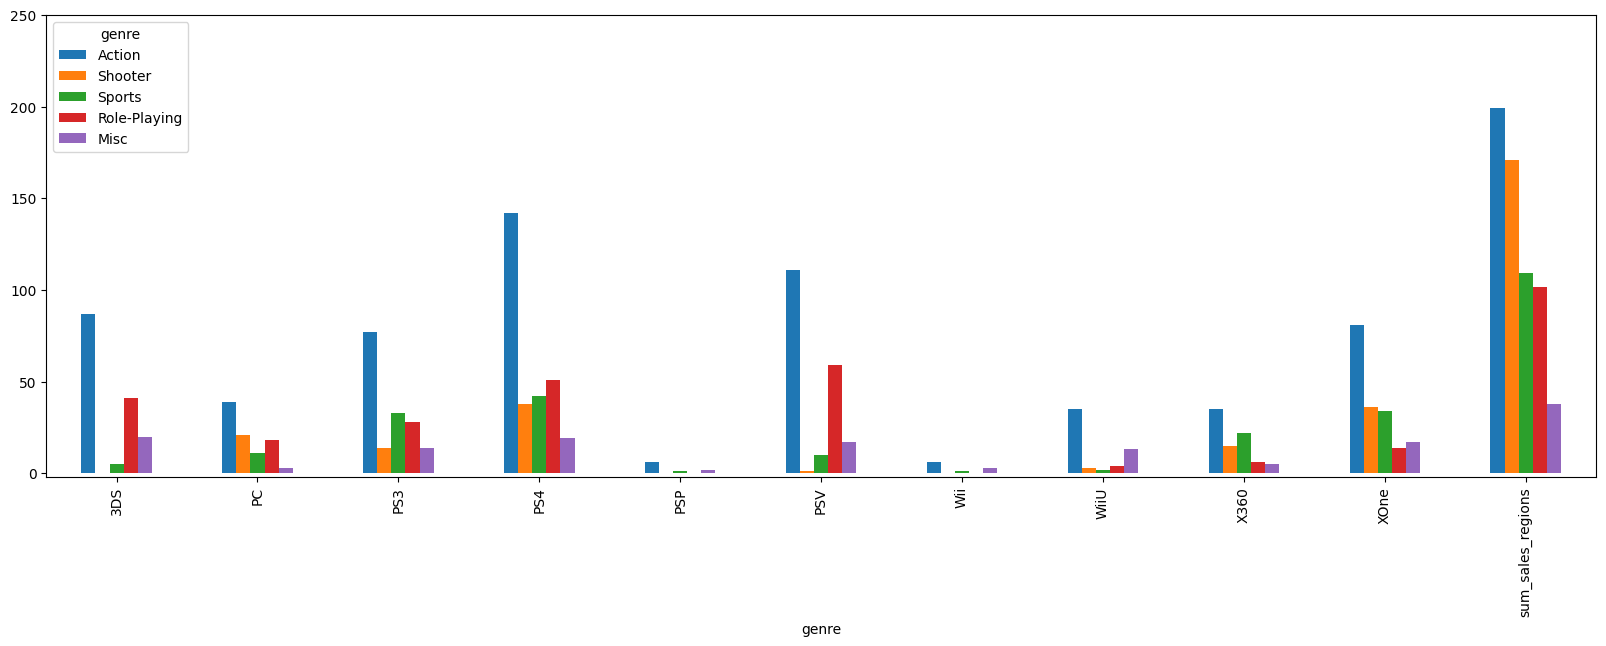

In [54]:
#построим график для определения на каких платформах продавались лучше всего топ-5 жанров
result_sort_trans.plot(kind='bar', xlabel='genre', figsize=(20,6));
plt.ylim(-2, 250)

По созданной таблице и графику мы выделим на каких платформах больше всего продавались топ-5 жанров:
- Экшн - максмиальное количество на платформе PS4 (142);
- Ролевые игры - максмиальное количество на платформе PSV (59);
- Шутеры (стрелялки) - максмиальное количество на платформе PS4 (38);
- Спортивные - максмиальное количество на платформе PS4 (42);
- Misc - максмиальное количество на платформе 3DS (20).

Выполним сравнение медианных продаж и построим диаграммы размаха для более точного изучения топ-5 жанров.

In [55]:
#создадим сводную таблицу по количеству жанров проданных на платформы
genre_for_platform_median = data_for_analysis.pivot_table(index='genre', columns='platform', values='sum_sales_regions', aggfunc='median')
#соединим с genre_table
result_median = pd.merge(genre_for_platform_median, genre_table, on="genre")
result_median_sort = result_median.sort_values(by='sum_sales_regions', ascending=False).head(5)
#перевернем таблицу для удобного анализа
result_median_sort_trans = result_sort.T
#выведим таблицу
result_median_sort_trans

genre,Action,Shooter,Sports,Role-Playing,Misc
3DS,87.00,NaN,5.00,41.00,20.00
PC,39.00,21.00,11.00,18.00,3.00
PS3,77.00,14.00,33.00,28.00,14.00
PS4,142.00,38.00,42.00,51.00,19.00
PSP,6.00,NaN,1.00,NaN,2.00
PSV,111.00,1.00,10.00,59.00,17.00
Wii,6.00,NaN,1.00,NaN,3.00
WiiU,35.00,3.00,2.00,4.00,13.00
X360,35.00,15.00,22.00,6.00,5.00
XOne,81.00,36.00,34.00,14.00,17.00


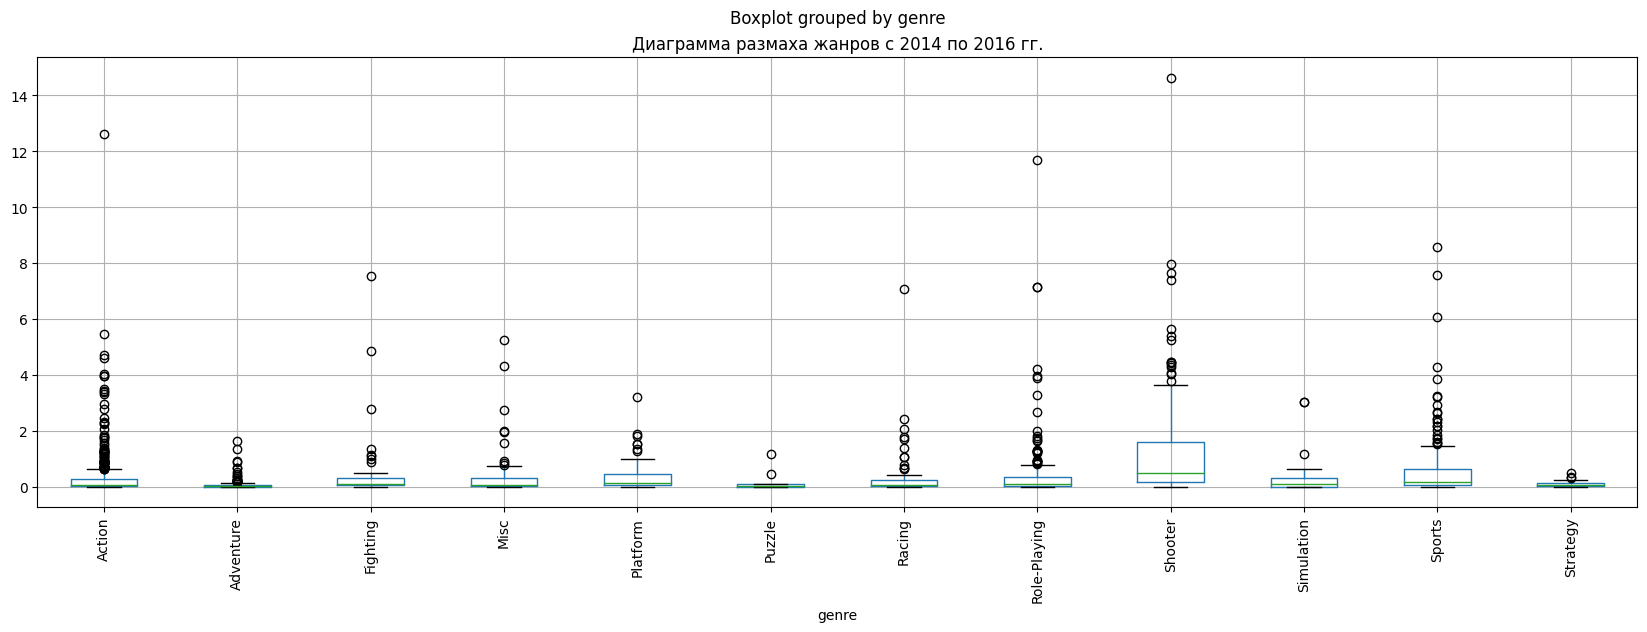

In [56]:
#построим диаграммы размаха
data_for_analysis.boxplot(column='sum_sales_regions', by='genre', figsize=(20,6))
plt.title('Диаграмма размаха жанров с 2014 по 2016 гг.')
plt.xticks(rotation=90)
plt.show()

На диаграмме разамахе присутствуют выбросы как частые, так и редкие. Обусловлено тем, что игра в определенной момент могла выстрелить и собрать большие продажи. Также если посмотреть на жанр Shooter можно увидеть хорошие границы - это может быть говорить о том, что игры данного жанра хорошо продаются на постоянной основе.Для изучения границ и медианных значений уменьшим размах до 2 млн.

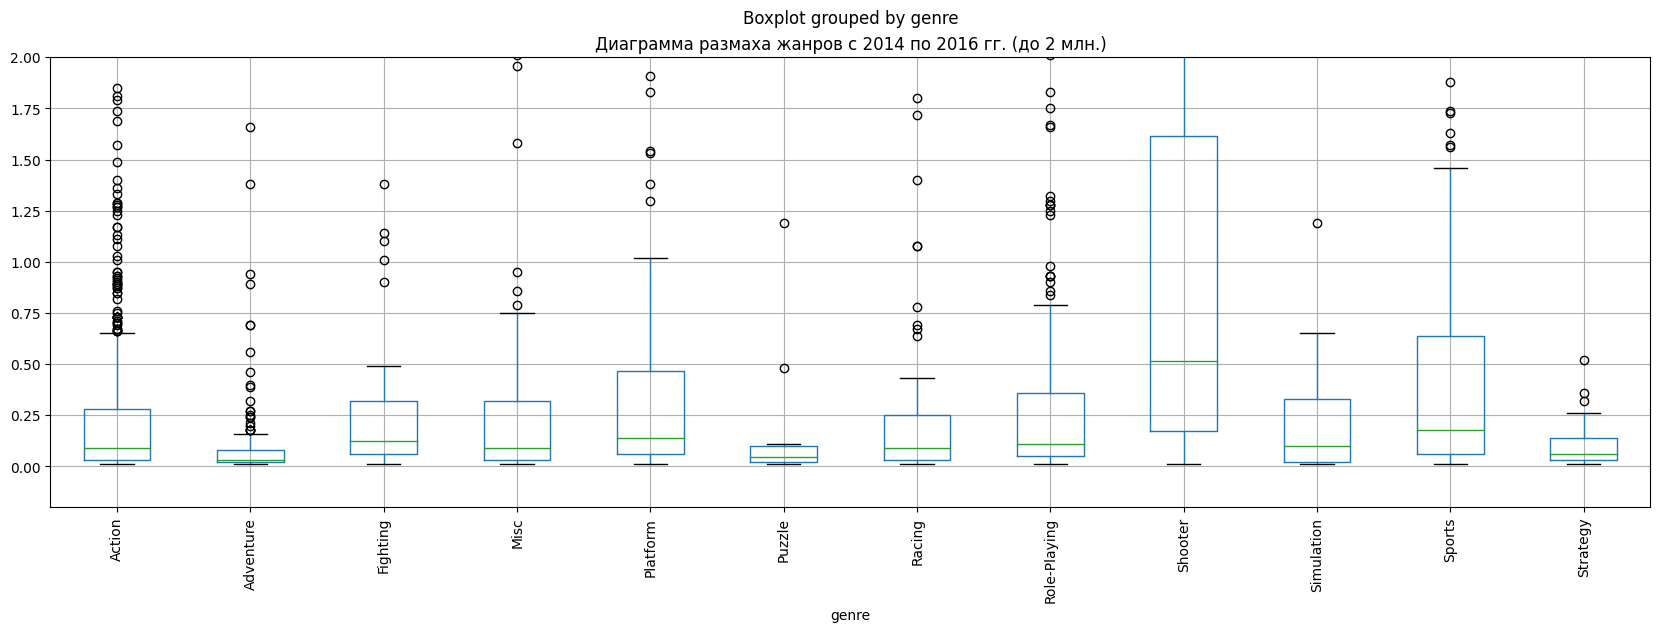

In [57]:
#построим диаграммы размаха
data_for_analysis.boxplot(column='sum_sales_regions', by='genre', figsize=(20,6))
plt.ylim(-0.2, 2)
plt.title('Диаграмма размаха жанров с 2014 по 2016 гг. (до 2 млн.)')
plt.xticks(rotation=90)
plt.show()

По масштабированной диаграмме наблюдаем следующую ситуацию:
- Медианные значения практически всех жанров находятся в одном диапазорне до 0,25 млн.
- Выделяются следующие платформы:
  - Shooter - высока медиана по сравнению с другими, широкие границы, следовательно хорошо продается, а также имеет выходы игр, которые создают ажиотаж;
  - Action - большое количество выбросов, которые также говорят, что много игр данного жанра выходят регулярно и производят фурор;
  - Sports - имеет высокие границы;
  - Royal-Playing - чатсые выбросы, следовательно частый выход игр с хорошими продажами;
  - Adventure - также частые выбросы, которые хорошо продаются.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Вот тут мы делаем ошибку, так как используем таблицу не за весь актуальный период, а отфильтрованную  по платформам. Но жанр является свойством игры, а не платформы. В итоге мы таким образом отфильтровали более 37% объема продаж. См.код ниже.</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
</font><font color='Grey'><b>Удалил обработку всего датасета, осталась обработка только за актуальный период. Смотри выше.</b></font><br>

~~# Комментарий ревьюера
temp1, temp2 = data_for_analysis.sum_sales_regions.sum(), data.query('2014 <= year_of_release <= 2016').sum_sales_regions.sum()
temp1, temp2, round((temp2-temp1)/temp2*100, 2)~~

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Мы здесь попали в ловушку, что максимальные продажи являются самыми прибыльными. Но у нас в данных продажи по жанру для разных платформ, и если одна платформа со своей одной игрой в данном жанре выстрелила, а остальные провалились, то мы все равно будем видеть максимум общих продаж, даже если остальные платформы провалились. Но для прибыльности нам нужен стабильные жанры, который приносит доход не зависимо от платформы, значит на этот жанр есть устойчивый спрос.</font><br>
<font color='Red'>🛠 По этому нам лучше добавить сравнение медианных продаж, проиллюстрировав их диаграммами размаха и изменить промежуточные выводы.</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
</font><font color='Grey'><b>Добавил диаграммы размаха для проверки медианных продаж по жанрам, внес изменения в промежуточные выводы.</b></font><br>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 В проекте под "прибыльностью" понимается наличие устойчивого спроса пользователей на данный жанр. Можно сделать уникальный сюжет, быстрый движок, красивую графику и вложить немеряно денег в рекламу и продажи игры подпрыгнут. Но нам лучше выбирать игру из жанра, на которой есть постоянный спрос независимо от маркетинговых усилий производителей игр.<br>
Это хороший пример, когда на одних и тех же данных разные диаграммы дают разный анализ. Визуализация это не только красивое представление табличных данных, а еще и инструмент анализа.</font>

<b>Итог:</b>

Исследовательский анализ данных мной был начат с изучения количества проданных по всему предоставленному периоду, в результате чего определеили актуальный период для проработки кампании на 2017 год - этот период с 2014 по 2016 гг.

Далее были проведены расчеты и выделения в актульный период максимально прибыльные платформы:
- PlayStation 4 - крепкий и уверенный лидер по продажам. Количество продаж на данную платформу в течении актуального периода всегда росло.
- Xbox One - постоянный плавный рост продаж, но в 1.5 раза меньше прибыль, чем у определенного лидера.
- PC - по данной платформе можно сказать, что самая стабильная и без каких-либо резких взлетов, продажи находятся практически в горизонтали, но все равно имеют рост.

После определения популярных платформ мной была построена диаграмма размаха по глобальным продажам игр в разбивке по платформам. По полученной диаграмме размаха наблюдались редкие выбросы в диапазоне 80 млн, а также частые выбросы в диапазоне от 20 до 40 млн. Была проведена проверка, какую часть от таблицы по актульному периоду составляют выбросы. Данная часть превышает 10%, в следствии чего было принято решение, что данные необходимо оставить, так как удаление их может повредить последующему анализу.

Далее мы посмотрели влияние отзывов пользователей и критиков на общие продажи игр. Для этого были построены графики рассеивания и корреляция между оценками пользователей/критиков и суммарными продажами.
Благодаря выполненым расчетам мы получули следующие значения:
- Слабо отрицательная корреляция равна -0.040131589472697356.
- Слабо положительная корреляция равно 0.40266141068104083.

По корреляциям и данным на графиках можно сделать следующие заключения:
- наибольшее количество оценок как и пользователей, так и критиков положительные;
- зависимость между оценками и продажами стремится к нуля, по этому можно считать, что зависимость не сильная.

В завершении были проанализированы жанры игры. В результате мы получили на актуальный период следующие результаты.

В Топ-5 с 2014 по 2016 гг. самых продаваемых жанров входят:
- Экшн;
- Шутеры (стрелялки);
- Сопртивные;
- Ролевые игры;
- Misc.

В Топ-5 самых непродаваемых жанров входят:
- Платформенные;
- Приключения;
- Симуляторы;
- Стратегии;
- Мозаики.

Также посмотрели на диаграмме размаха медианные показатели по жанрам из чего можно сделать следующие выводы:
- Медианные значения практически всех жанров находятся в одном диапазорне до 0,25 млн.
- Выделяются следующие платформы:
  - Shooter - высока медиана по сравнению с другими, широкие границы, следовательно хорошо продается, а также имеет выходы игр, которые создают ажиотаж;
  - Action - большое количество выбросов, которые также говорят, что много игр данного жанра выходят регулярно и производят фурор;
  - Sports - имеет высокие границы;
  - Royal-Playing - чатсые выбросы, следовательно частый выход игр с хорошими продажами;
  - Adventure - также частые выбросы, которые хорошо продаются.

### Портреты пользователей каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишем различия в долях продаж.
- Самые популярные жанры (топ-5). Поясним разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

#### Портрет пользователей Северной Америки (NA)

##### Самые популярные платформы

<font color='DarkBlue'><b>Комментарий ревьюера</b></font>
<br><font color='Red'>🛠 Для анализа не используется актуальный период.</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
</font><font color='Grey'><b>Удалил работу по общему датасету, выполняется работа по актуальному периоду без фильтрации.</b></font><br>

In [58]:
#создадим таблицу для определения популярных платформ за актуальный период
top_actual_platform_na = data_for_analysis.pivot_table(index='platform', values='na_sales', aggfunc='sum')

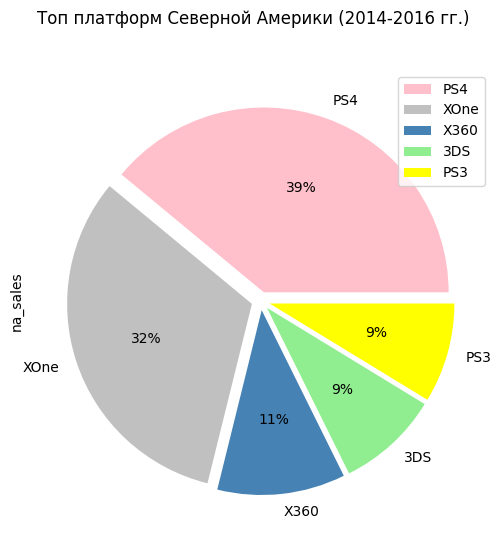

In [59]:
#создадим график отображения топ-5 популярных платформ в NA
colors = ['pink', 'silver', 'steelblue', 'lightgreen', 'yellow']
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

(
    top_actual_platform_na
        .sort_values(by='na_sales', ascending=False).head(5)
        .plot(kind='pie', y='na_sales', autopct='%1.0f%%', colors=colors, explode=explode, subplots=True, figsize=(6, 6,), title='Топ платформ Северной Америки (2014-2016 гг.)')
);

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Хорошо, теперь правильно. 👍</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 И как мы строим топ-5 по трем платформам?</font>

Для рассматриваемого актуального периода по продажам в Северной Америке формируется данный Топ-5:
- PS4 - 59% от общих продаж региона;
- XOne - 32% от общих продаж региона;
- X360 - 11% от общих продаж региона;
- 3DS - 9% от общих продаж региона;
- PS3 - 9% от общих продаж региона.

Посчитаем разницу в долях продаж.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font>
<br><font color='Red'>🛠 Для анализа не используется актуальный период.</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
</font><font color='Grey'><b>Для анализа использую таблицу по акутальному периоду.</b></font><br>

In [60]:
# считаем долю продаж в Северной Америке по нашей таблице
platform_sum_full = data_for_analysis.pivot_table(index='platform', values='sum_sales_regions', aggfunc='sum')
platform_sum_full

# вычисляем процентное соотношение
percent_na = top_actual_platform_na['na_sales'] / platform_sum_full['sum_sales_regions'] * 100
display('Доля продаж в Северной Америке:')
display(percent_na.dropna().sort_values(ascending=False))

'Доля продаж в Северной Америке:'

platform
X360    58.689341
XOne    57.901111
WiiU    45.044207
Wii     41.025641
PS4     34.221760
PS3     32.340862
PC      26.728281
3DS     26.119059
PSV     11.250000
PSP      0.000000
dtype: float64

В Северной Америке наиболее продаваемую долю от общих продаж предоставляет Xbox 360 (X360). Доля от общих продаж за период с 2014 по 2016 год составляется 58%. На втором месте по популярность Xbox One (XOne), ее доля 57%. Не смотря на то, что PS4 находится на первом месте Топ-5, от общих продаж платформа покрывает только 34%.

##### Самые популярные жанры

<font color='DarkBlue'><b>Комментарий ревьюера</b></font>
<br><font color='Red'>🛠 Для анализа не используется актуальный период.</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
</font><font color='Grey'><b>Удалил работу по общему датасету, выполняется работа по актуальному периоду без фильтрации.</b></font><br>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font>
<br><font color='Red'>🛠 Для анализа используется актуальный период сокращенный по платформам.</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
</font><font color='Grey'><b>Для анализа использую таблицу по акутальному периоду.</b></font><br>

In [61]:
#создадим таблицу для определения популярных жанров за актуальный период
top_actual_genre_na = data_for_analysis.pivot_table(index='genre', values='na_sales', aggfunc='sum')

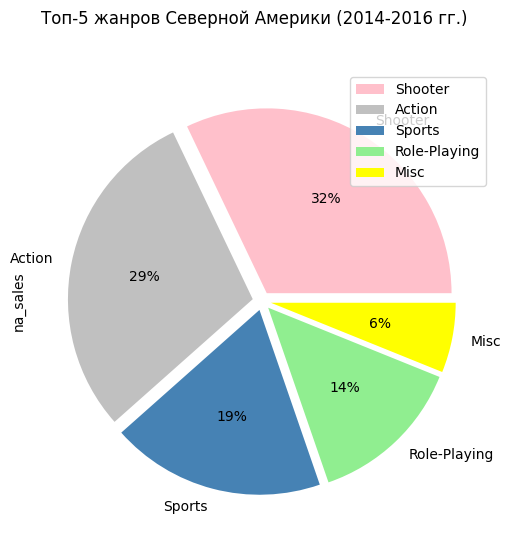

In [62]:
#создадим график отображения топ-5 популярных жанров в NA
colors = ['pink', 'silver', 'steelblue', 'lightgreen', 'yellow']
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

(
    top_actual_genre_na
        .sort_values(by='na_sales', ascending=False).head(5)
        .plot(kind='pie', y='na_sales', autopct='%1.0f%%', colors=colors, explode=explode, subplots=True, figsize=(6, 6,), title='Топ-5 жанров Северной Америки (2014-2016 гг.)')
);

Для рассматриваемого актуального периода диаграмма будет выглядеть иначе:
- Shooter - 32% от общих продаж региона;
- Action - 29% от общих продаж региона;
- Sports - 19% от общих продаж региона;
- Role-Playing - 14% от общих продаж региона;
- Misc - 6% от общих продаж региона.

Посчитаем разницу в долях продаж.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font>
<br><font color='Red'>🛠 Для анализа не используется актуальный период.</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
</font><font color='Grey'><b>Для анализа использую таблицу по акутальному периоду.</b></font><br>

In [63]:
# считаем долю продаж в Северной Америке по нашей таблице
genre_sum_full = data_for_analysis.pivot_table(index='genre', values='sum_sales_regions', aggfunc='sum')
platform_sum_full

# вычисляем процентное соотношение
percent_genre_na = top_actual_genre_na['na_sales'] / genre_sum_full['sum_sales_regions'] * 100
display('Доля продаж по жанрам в Северной Америке:')
display(percent_genre_na.dropna().sort_values(ascending=False).head(5))

'Доля продаж по жанрам в Северной Америке:'

genre
Shooter     46.226746
Fighting    44.046775
Sports      42.135550
Misc        40.079893
Platform    37.534549
dtype: float64

##### Влияние рейтинга ESRB на продажи в Северной Америке

<font color='DarkBlue'><b>Комментарий ревьюера</b></font>
<br><font color='Red'>🛠 Для анализа используется актуальный период сокращенный по платформам.</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
</font><font color='Grey'><b>Для анализа использую таблицу по акутальному периоду.</b></font><br>

In [64]:
#  Рейтинг от организации ESRB в Северной Америке
rating_esrb_na = data_for_analysis.pivot_table(index='rating', values='na_sales', aggfunc='sum').reset_index()

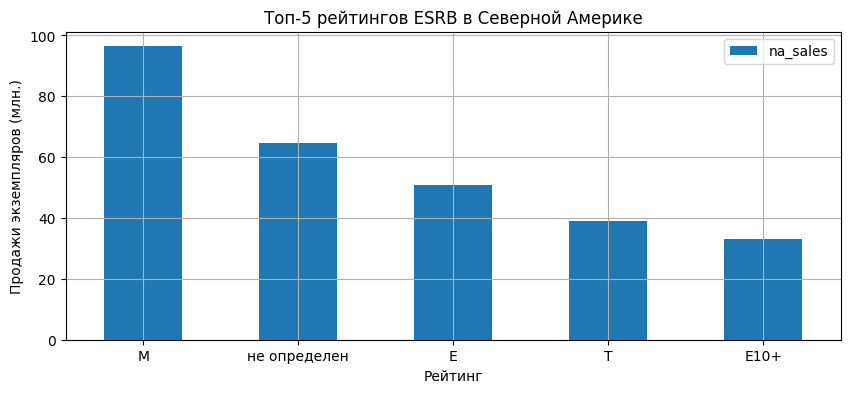

In [65]:
(
    rating_esrb_na
        .sort_values(by='na_sales', ascending=False)
        .plot(x = 'rating', y = 'na_sales', kind = 'bar', figsize=(10,4), grid=True, title = 'Топ-5 рейтингов ESRB в Северной Америке')
);

plt.xlabel('Рейтинг')
plt.ylabel('Продажи экземпляров (млн.)')
plt.xticks(rotation=0)
plt.show()

Наиболее покупамые игры в Северной Америке имеют рейтинг М (Для взрослых), это подтверждлает и самый популярный жанр продавай в регионе - Шутеры. На втором месте по продажам игры с не определенным рейтингом ESRB. Остальные позиции занимаются игры, которые по рейтингу попадают в категории для подростков, детей и для всех.

#### Портрет пользователей Европы (EU)

##### Самые популярные платформы

<font color='DarkBlue'><b>Комментарий ревьюера</b></font>
<br><font color='Red'>🛠 Для анализа не используется актуальный период.</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
</font><font color='Grey'><b>Удалил работу по общему датасету, выполняется работа по актуальному периоду без фильтрации.</b></font><br>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font>
<br><font color='Red'>🛠 Для анализа используется актуальный период сокращенный по платформам.</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
</font><font color='Grey'><b>Для анализа использую таблицу по акутальному периоду.</b></font><br>

In [66]:
#создадим таблицу для определения популярных платформ за актуальный период
top_actual_platform_eu = data_for_analysis.pivot_table(index='platform', values='eu_sales', aggfunc='sum')

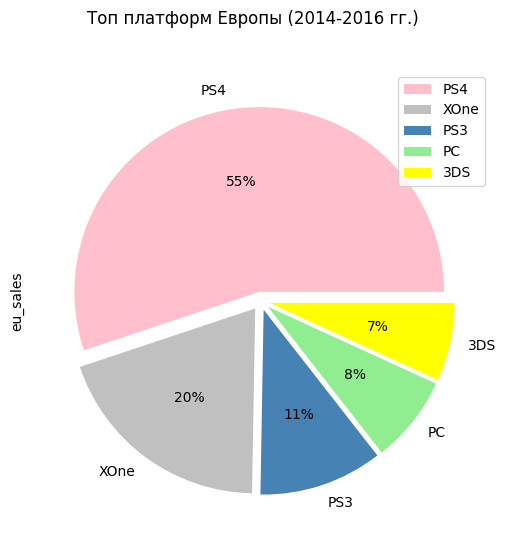

In [67]:
#создадим график отображения топ-5 популярных платформ в EU
colors = ['pink', 'silver', 'steelblue', 'lightgreen', 'yellow']
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

(
    top_actual_platform_eu
        .sort_values(by='eu_sales', ascending=False).head(5)
        .plot(kind='pie', y='eu_sales', autopct='%1.0f%%', colors=colors, explode=explode, subplots=True, figsize=(6, 6,), title='Топ платформ Европы (2014-2016 гг.)')
);

Для рассматриваемого актуального периода диаграмма будет выглядеть иначе, так как рассматриваются только 3 платформы:
- PS4 - 55% от общих продаж;
- XOne - 20% от общих продаж;
- PS3 - 11% от общих продаж;
- PC - 8% от общих продаж;
- 3DS - 7% от общих продаж;

Посчитаем разницу в долях продаж.

In [68]:
# вычисляем процентное соотношение
percent_eu = top_actual_platform_eu['eu_sales'] / platform_sum_full['sum_sales_regions'] * 100
display('Доля продаж в Европе:')
display(percent_na.dropna().sort_values(ascending=False))

'Доля продаж в Европе:'

platform
X360    58.689341
XOne    57.901111
WiiU    45.044207
Wii     41.025641
PS4     34.221760
PS3     32.340862
PC      26.728281
3DS     26.119059
PSV     11.250000
PSP      0.000000
dtype: float64

В Европе доля  максимальную от общих продаж за период с 2014 по 2016 год дает платформа Xbox One (XOne) составляется 51%. На втором месте по популярность PlayStation 4 (PS4), ее доля 31%.

##### Самые популярные жанры

<font color='DarkBlue'><b>Комментарий ревьюера</b></font>
<br><font color='Red'>🛠 Для анализа не используется актуальный период.</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
</font><font color='Grey'><b>Удалил работу по общему датасету, выполняется работа по актуальному периоду без фильтрации.</b></font><br>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font>
<br><font color='Red'>🛠 Для анализа используется актуальный период сокращенный по платформам.</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
</font><font color='Grey'><b>Для анализа использую таблицу по акутальному периоду.</b></font><br>

In [69]:
#создадим таблицу для определения популярных жанров за актуальный период
top_actual_genre_eu = data_for_analysis.pivot_table(index='genre', values='eu_sales', aggfunc='sum')

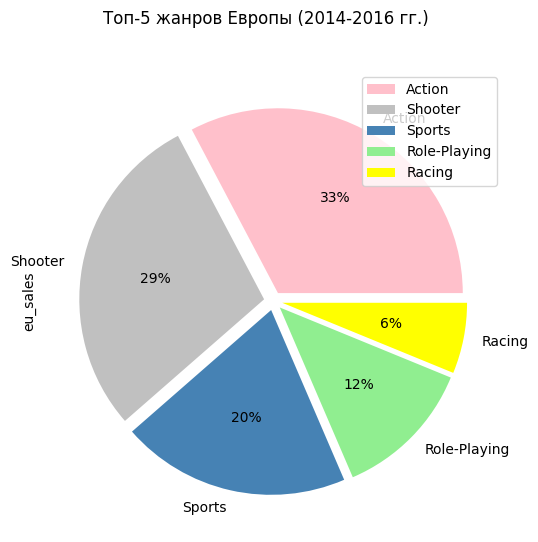

In [70]:
#создадим график отображения топ-5 популярных жанров в EU
colors = ['pink', 'silver', 'steelblue', 'lightgreen', 'yellow']
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

(
    top_actual_genre_eu
        .sort_values(by='eu_sales', ascending=False).head(5)
        .plot(kind='pie', y='eu_sales', autopct='%1.0f%%', colors=colors, explode=explode, subplots=True, figsize=(6, 6,), title='Топ-5 жанров Европы (2014-2016 гг.)')
);

Для рассматриваемого актуального периода диаграмма будет выглядеть иначе:
- Action - 33% от общих продаж региона;
- Shooter - 29% от общих продаж региона;
- Sports - 20% от общих продаж региона;
- Role-Playing - 12% от общих продаж региона;
- Racing - 6% от общих продаж региона.

Посчитаем разницу в долях продаж.

In [71]:
# вычисляем процентное соотношение
percent_genre_eu = top_actual_genre_eu['eu_sales'] / genre_sum_full['sum_sales_regions'] * 100
display('Доля продаж по жанрам в Европе:')
display(percent_genre_eu.dropna().sort_values(ascending=False).head(5))

'Доля продаж по жанрам в Европе:'

genre
Simulation    55.597867
Racing        51.344477
Strategy      45.202020
Sports        41.770186
Shooter       38.329238
dtype: float64

##### Влияние рейтинга ESRB на продажи в Европе

<font color='DarkBlue'><b>Комментарий ревьюера</b></font>
<br><font color='Red'>🛠 Для анализа используется актуальный период сокращенный по платформам.</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
</font><font color='Grey'><b>Для анализа использую таблицу по акутальному периоду.</b></font><br>

In [72]:
#  Рейтинг от организации ESRB в Европе
rating_esrb_eu = data_for_analysis.pivot_table(index='rating', values='eu_sales', aggfunc='sum').reset_index()

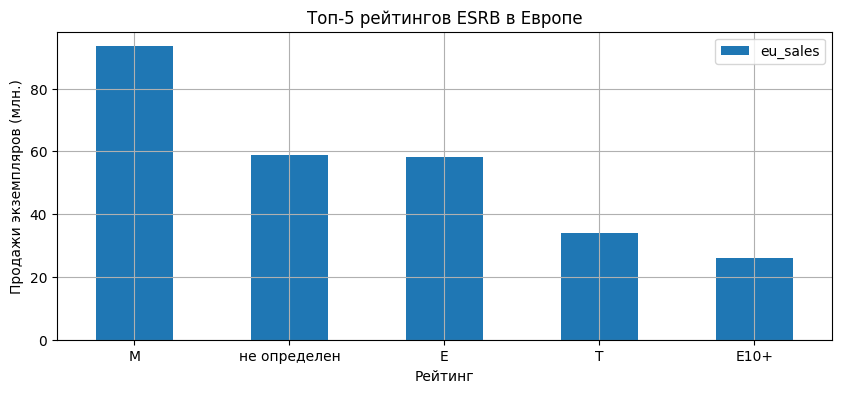

In [73]:
(
    rating_esrb_eu
        .sort_values(by='eu_sales', ascending=False)
        .plot(x = 'rating', y = 'eu_sales', kind = 'bar', figsize=(10,4), grid=True, title = 'Топ-5 рейтингов ESRB в Европе')
);

plt.xlabel('Рейтинг')
plt.ylabel('Продажи экземпляров (млн.)')
plt.xticks(rotation=0)
plt.show()

Наиболее покупамые игры в Европе, как и в Северной Америке,  имеют рейтинг М (Для взрослых), это подтверждлает и самый популярные жанры продаваемые в регионе - Экшены и Шутеры. На втором месте по продажам игры с не определенным рейтингом ESRB. Остальные позиции занимаются игры, которые по рейтингу попадают в категории для подростков, детей и для всех.

#### Портрет пользователей Японии (JP)

##### Самые популярные платформы

<font color='DarkBlue'><b>Комментарий ревьюера</b></font>
<br><font color='Red'>🛠 Для анализа не используется актуальный период.</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
</font><font color='Grey'><b>Удалил работу по общему датасету, выполняется работа по актуальному периоду без фильтрации.</b></font><br>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font>
<br><font color='Red'>🛠 Для анализа используется актуальный период сокращенный по платформам.</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
</font><font color='Grey'><b>Для анализа использую таблицу по акутальному периоду.</b></font><br>

In [74]:
#создадим таблицу для определения популярных платформ за актуальный период
top_actual_platform_jp = data_for_analysis.pivot_table(index='platform', values='jp_sales', aggfunc='sum')

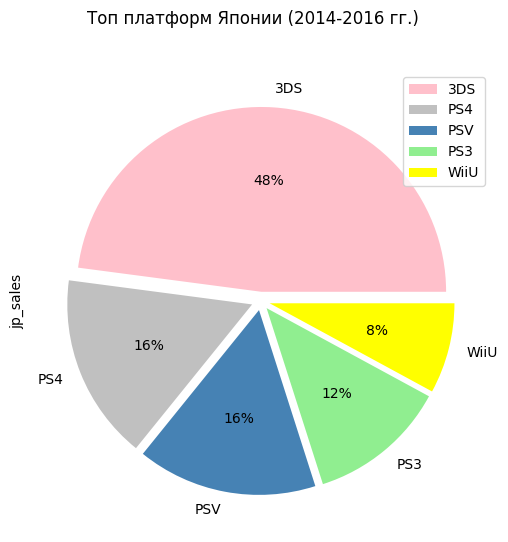

In [75]:
#создадим график отображения топ-5 популярных платформ в NA
colors = ['pink', 'silver', 'steelblue', 'lightgreen', 'yellow']
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

(
    top_actual_platform_jp
        .sort_values(by='jp_sales', ascending=False).head(5)
        .plot(kind='pie', y='jp_sales', autopct='%1.0f%%', colors=colors, explode=explode, subplots=True, figsize=(6, 6,), title='Топ платформ Японии (2014-2016 гг.)')
);

Для рассматриваемого актуального периода диаграмма будет выглядеть иначе, так как рассматриваются только 2 платформы:
- 3DS - 48% от общих продаж;
- PS4 - 16% от общих продаж;
- PSV - 16% от общих продаж;
- PS3 - 12% от общих продаж;
- WiiU - 8% от общих продаж.

Посчитаем разницу в долях продаж.

In [76]:
# вычисляем процентное соотношение
percent_jp = top_actual_platform_jp['jp_sales'] / platform_sum_full['sum_sales_regions'] * 100
display('Доля продаж в Японии:')
display(percent_jp.dropna().sort_values(ascending=False))

'Доля продаж в Японии:'

platform
PSP     100.000000
PSV      64.910714
3DS      51.038302
WiiU     17.007911
PS3      16.456439
PS4       5.212563
XOne      0.227985
X360      0.165906
PC        0.000000
Wii       0.000000
dtype: float64

##### Самые популярные жанры

<font color='DarkBlue'><b>Комментарий ревьюера</b></font>
<br><font color='Red'>🛠 Для анализа не используется актуальный период.</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
</font><font color='Grey'><b>Удалил работу по общему датасету, выполняется работа по актуальному периоду без фильтрации.</b></font><br>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font>
<br><font color='Red'>🛠 Для анализа используется актуальный период сокращенный по платформам.</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
</font><font color='Grey'><b>Для анализа использую таблицу по акутальному периоду.</b></font><br>

In [77]:
#создадим таблицу для определения популярных жанров за актуальный период
top_actual_genre_jp = data_for_analysis.pivot_table(index='genre', values='jp_sales', aggfunc='sum')

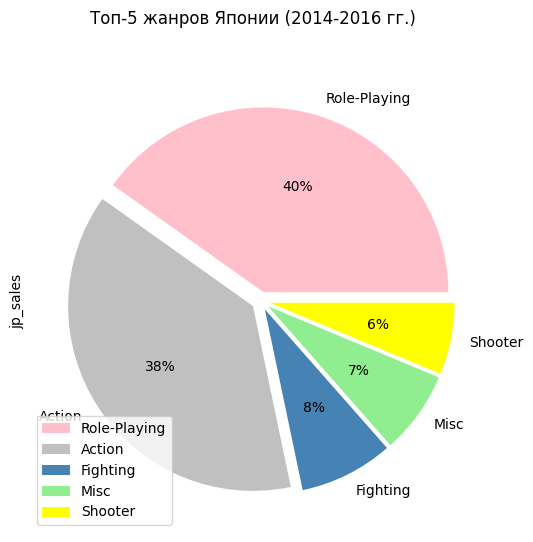

In [78]:
#создадим график отображения топ-5 популярных жанров в JP
colors = ['pink', 'silver', 'steelblue', 'lightgreen', 'yellow']
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

(
    top_actual_genre_jp
        .sort_values(by='jp_sales', ascending=False).head(5)
        .plot(kind='pie', y='jp_sales', autopct='%1.0f%%', colors=colors, explode=explode, subplots=True, figsize=(6, 6,), title='Топ-5 жанров Японии (2014-2016 гг.)')
);

Для рассматриваемого актуального периода диаграмма будет выглядеть иначе:
- Role-Playing - 40% от общих продаж региона;
- Action - 38% от общих продаж региона;
- Fighting - 8% от общих продаж региона;
- Misc - 7% от общих продаж региона;
- Shooter - 6% от общих продаж региона;


Посчитаем разницу в долях продаж.

In [79]:
# вычисляем процентное соотношение
percent_genre_jp = top_actual_genre_jp['jp_sales'] / genre_sum_full['sum_sales_regions'] * 100
display('Доля продаж по жанрам в Японии:')
display(percent_genre_jp.dropna().sort_values(ascending=False).head(5))

'Доля продаж по жанрам в Японии:'

genre
Puzzle          42.081448
Role-Playing    30.717666
Strategy        23.989899
Fighting        22.572644
Adventure       20.512821
dtype: float64

##### Влияние рейтинга ESRB на продажи в Японии

<font color='DarkBlue'><b>Комментарий ревьюера</b></font>
<br><font color='Red'>🛠 Для анализа используется актуальный период сокращенный по платформам.</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
</font><font color='Grey'><b>Для анализа использую таблицу по акутальному периоду.</b></font><br>

In [80]:
#  Рейтинг от организации ESRB в Японии
rating_esrb_jp = data_for_analysis.pivot_table(index='rating', values='jp_sales', aggfunc='sum').reset_index()

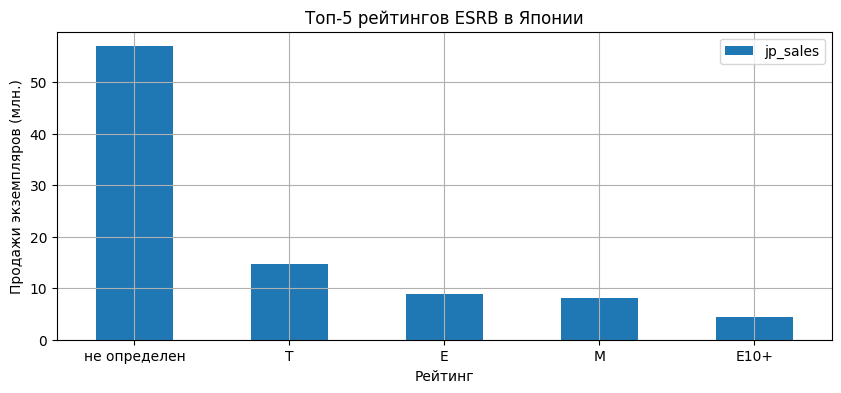

In [81]:
(
    rating_esrb_jp
        .sort_values(by='jp_sales', ascending=False)
        .plot(x = 'rating', y = 'jp_sales', kind = 'bar', figsize=(10,4), grid=True, title = 'Топ-5 рейтингов ESRB в Японии')
);

plt.xlabel('Рейтинг')
plt.ylabel('Продажи экземпляров (млн.)')
plt.xticks(rotation=0)
plt.show()

Наиболее покупамые в Японии игры с неопределенным рейтингом. На втором месте по продажам игры с рейтингом M (для взрослых) ESRB. Остальные позиции занимаются игры, которые по рейтингу попадают в категории для подростков, детей и для всех.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Вот такая проблема была с рейтингом. <br>
А дело в том, что если посмотреть в инете, что из себя представляет рейтинг ESRB, то окажется, что он предназначен для маркировки игр для США и Канады. И логично, что для других регионов он не заполняется. А в Японии есть свой рейтинг, свой рейтинг есть в ЕС и отдельно в Германии, Австралии и т.д., но по ним у нас нет данных. То есть, в данном случае пропуск имеет признак, что игра выпущена не в Северо-Американском регионе. Необходимо шире смотреть на исходный датасет, так как за цифрами находятся реальные бизнес-процессы. Мы должны это учитывать при предобработке данных. 👍</font>

#### Портрет пользователей по другим регионам (other)

##### Самые популярные платформы

<font color='DarkBlue'><b>Комментарий ревьюера</b></font>
<br><font color='Red'>🛠 Для анализа не используется актуальный период.</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
</font><font color='Grey'><b>Удалил работу по общему датасету, выполняется работа по актуальному периоду без фильтрации.</b></font><br>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font>
<br><font color='Red'>🛠 Для анализа используется актуальный период сокращенный по платформам.</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
</font><font color='Grey'><b>Для анализа использую таблицу по акутальному периоду.</b></font><br>

In [82]:
#создадим таблицу для определения популярных платформ за актуальный период
top_actual_platform_other = data_for_analysis.pivot_table(index='platform', values='other_sales', aggfunc='sum')

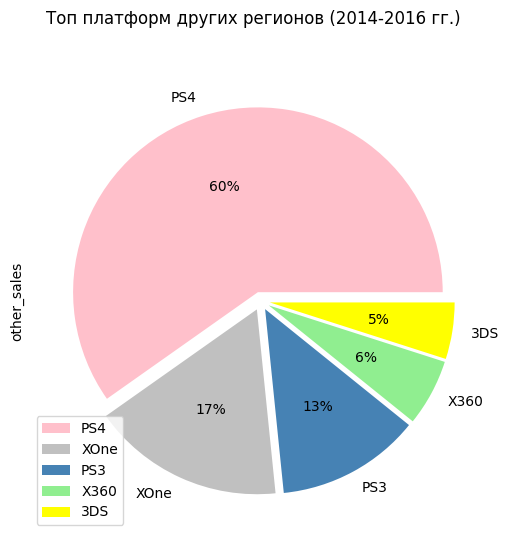

In [83]:
#создадим график отображения топ-5 популярных платформ в других регионах
colors = ['pink', 'silver', 'steelblue', 'lightgreen', 'yellow']
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

(
    top_actual_platform_other
        .sort_values(by='other_sales', ascending=False).head(5)
        .plot(kind='pie', y='other_sales', autopct='%1.0f%%', colors=colors, explode=explode, subplots=True, figsize=(6, 6,), title='Топ платформ других регионов (2014-2016 гг.)')
);

Для рассматриваемого актуального периода диаграмма будет выглядеть иначе, так как рассматриваются только 3 платформы:
- PS4 - 60% от общих продаж регионов;
- XOne - 17% от общих продаж регионов;
- PS3 - 13% от общих продаж регионов;
- X360 - 6% от общих продаж регионов;
- 3DS - 5% от общих продаж регионов.

Посчитаем разницу в долях продаж.

In [84]:
# вычисляем процентное соотношение
percent_other = top_actual_platform_other['other_sales'] / platform_sum_full['sum_sales_regions'] * 100
display('Доля продаж в других регионах:')
display(percent_other.dropna().sort_values(ascending=False))

'Доля продаж в других регионах:'

platform
PS4     15.436405
PS3     13.743033
X360     9.021153
XOne     8.919920
PSV      8.080357
Wii      7.889546
WiiU     7.352257
PC       6.839187
3DS      4.245501
PSP      0.000000
dtype: float64

В других регионах максимальную от общих продаж за период с 2014 по 2016 год дает платформа PlayStation (PS4) составляется 15%. На втором месте по популярность PlayStation (PS3), ее доля 13,7%.

##### Самые популярные жанры

<font color='DarkBlue'><b>Комментарий ревьюера</b></font>
<br><font color='Red'>🛠 Для анализа не используется актуальный период.</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
</font><font color='Grey'><b>Удалил работу по общему датасету, выполняется работа по актуальному периоду без фильтрации.</b></font><br>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font>
<br><font color='Red'>🛠 Для анализа используется актуальный период сокращенный по платформам.</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
</font><font color='Grey'><b>Для анализа использую таблицу по акутальному периоду.</b></font><br>

In [85]:
#создадим таблицу для определения популярных жанров за актуальный период
top_actual_genre_other = data_for_analysis.pivot_table(index='genre', values='other_sales', aggfunc='sum')

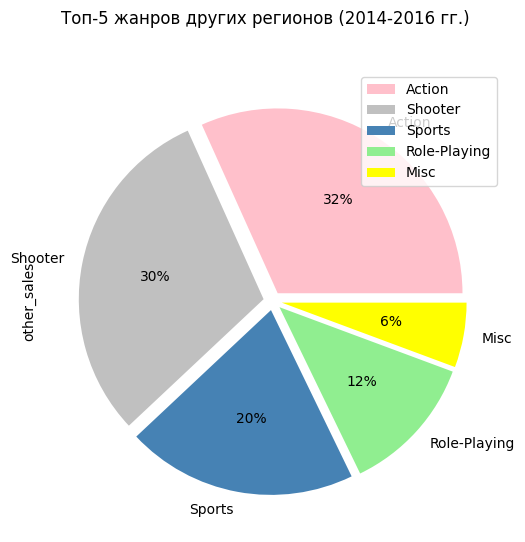

In [86]:
#создадим график отображения топ-5 популярных жанров в других регионах
colors = ['pink', 'silver', 'steelblue', 'lightgreen', 'yellow']
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

(
    top_actual_genre_other
        .sort_values(by='other_sales', ascending=False).head(5)
        .plot(kind='pie', y='other_sales', autopct='%1.0f%%', colors=colors, explode=explode, subplots=True, figsize=(6, 6,), title='Топ-5 жанров других регионов (2014-2016 гг.)')
);

Для рассматриваемого актуального периода диаграмма будет выглядеть иначе:
- Action - 32% от общих продаж региона;
- Shooter - 30% от общих продаж региона;
- Sports - 20% от общих продаж региона;
- Role-playing - 12% от общих продаж региона;
- Misc - 6% от общих продаж региона.

Посчитаем разницу в долях продаж.

In [87]:
# вычисляем процентное соотношение
percent_genre_other = top_actual_genre_other['other_sales'] / genre_sum_full['sum_sales_regions'] * 100
display('Доля продаж по жанрам в других регионах:')
display(percent_genre_other.dropna().sort_values(ascending=False).head(5))

'Доля продаж по жанрам в других регионах:'

genre
Sports     13.116551
Shooter    12.595063
Action     11.321228
Misc       10.732357
Racing     10.501453
dtype: float64

##### Влияние рейтинга ESRB на продажи в других регионах

<font color='DarkBlue'><b>Комментарий ревьюера</b></font>
<br><font color='Red'>🛠 Для анализа используется актуальный период сокращенный по платформам.</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
</font><font color='Grey'><b>Для анализа использую таблицу по акутальному периоду.</b></font><br>

In [88]:
#  Рейтинг от организации ESRB в других регионах
rating_esrb_other = data_for_analysis.pivot_table(index='rating', values='other_sales', aggfunc='sum').reset_index()

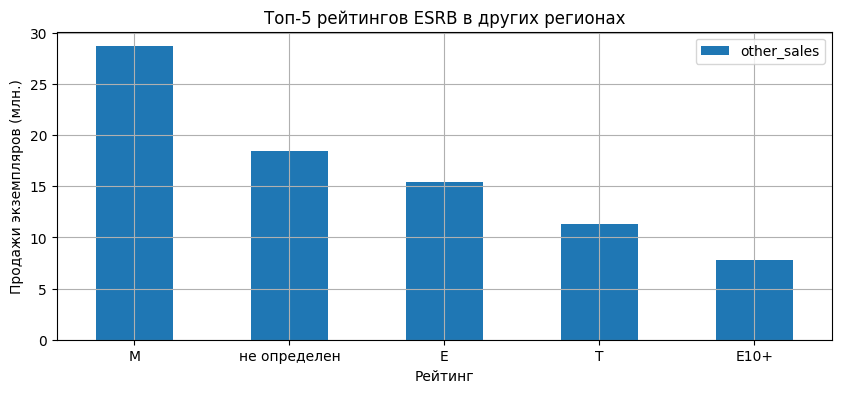

In [89]:
(
    rating_esrb_other
        .sort_values(by='other_sales', ascending=False)
        .plot(x = 'rating', y = 'other_sales', kind = 'bar', figsize=(10,4), grid=True, title = 'Топ-5 рейтингов ESRB в других регионах')
);

plt.xlabel('Рейтинг')
plt.ylabel('Продажи экземпляров (млн.)')
plt.xticks(rotation=0)
plt.show()

Наиболее покупамые в других регионах игры с рейтингом M (для взрослых), как и в Северной Америке и Европе. На втором месте по продажам игры с рейтингом ESRB не определен. Остальные позиции занимаются игры, которые по рейтингу попадают в категории для подростков, детей и для всех.

**Итог:**

В данном разделе были изучены портреты каждого региона, в которых продаются игры (Северная Америка, Европа, Япония и другие регионы). По полученным портретам по каждом портрету можно сделать следующие выводы:
- Самой популярной платформой в регионах является PlayStation (PS4), у 3х из 4х портретов данная платформа на первом месте (Северная Америка, Европа, другие регионы). В Японии популярнее Nintendo 3DS - это объясняется тем, что Япония является основным разработчиком данной платформы.
- Самыми популярными жанрами в регионах являются Action, Shooter, Role-Playing, Racing. Каждый из этих жанров во всех регионах входит в Топ-5;
- Изучая продаваемые жанры, а после и рейтингы игр, во всех регионах на первом месте два самых популярных рейтинга ESRB это M (для взрослых) либо не определен. Остальные рейтинги, попавшие в топ-5, присвоины играм для детей, подростков и в целом для всех возрастов - такую группу можно назвать "Семейной".

### Проверка гипотез

Проверим следующие гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Пороговое значение alpha зададим 5% (0.05).

#### Гипотеза - средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Для проверки гипотезы используемые следущие данные:
- пороговое значение 5% (0.05);
- нулевая гипотеза Н0: средние рейтинги платформ одинаковые
- альтернативная гипотеза Н1: средние рейтинги платформ разные

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, правильно сформулированы гипотезы.</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font>
<br><font color='Red'>🛠 Для анализа не используется актуальный период.</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
</font><font color='Grey'><b>Используется актульный период</b></font><br>

In [90]:
# убираем значения, которые были пропусками
data_task = data_for_analysis
data_task['user_score'] = data_task['user_score'].fillna(0)
data_task = data_task.query('user_score != 0')

#сфорируем две выборке по необходимым платформам
data_xbox = data_for_analysis[data_for_analysis['platform'] == 'XOne']
data_pc = data_for_analysis[data_for_analysis['platform'] == 'PC']

#обозначим две выборки свтолбцов с пользовательскими рейтингами
xbox_1 = data_xbox['user_score']
pc_1 = data_pc['user_score']

alpha = .05 # критический уровень статистической значимости

#если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(xbox_1, pc_1)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.32800030965842586
Не получилось отвергнуть нулевую гипотезу


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Хорошо, что отфильтровали пропуски. Только для этого лучше использовать стандартные методы.</font><br>
<font color='DarkGreen'>👌 Правильно, что для тестирования гипотез использован двусторонний t-тест.</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
</font><font color='Grey'><b>Не очень понял про какой стандартный метод ты говоришь. Перепробовал и dropna, и замену в str, далее использовал заглушки, но постоянно возравщалось NaN/</b></font><br>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 Мы стандартными методами удаляли пропуски в конкретных колонках в разделе предобработки данных.</font>
![image.png](attachment:image.png)

По результатам проверки отвергнута нулевая гипотеза "Средние рейтинги платформ одинаковые". По всей видимости каждая из платформ занимает свою нишу в разных регионах, на каждую из них присутствуют свои топ жанры, которые в свою очередь могут влиять на продажи и оценку пользователей и критиков.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Не правильно сформулирован вывод теста гипотезы. Тест не устанавливает равенство или не равенство.</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
</font><font color='Grey'><b>Исправлен вывод</b></font><br>

#### Гипотеза - cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Для проверки гипотезы используемые следущие данные:
- пороговое значение 5% (0.05);
- нулевая гипотеза Н0: средние рейтинги по жанрам одинаковые
- альтернативная гипотеза Н1: средние рейтинги по жанрам разные

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Не правильно сформулированы гипотезы.</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
</font><font color='Grey'><b>Пересмотрел гипотезы</b></font><br>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font>
<br><font color='Red'>🛠 Для анализа не используется актуальный период.</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
</font><font color='Grey'><b>Используется актуальный период</b></font><br>

In [91]:
#сфорируем две выборке по необходимым жанрам
data_action = data_task[data_task['genre'] == 'Action']
data_sports = data_task[data_task['genre'] == 'Sports']

#обозначим две выборки свтолбцов с пользовательскими рейтингами
action = data_action['user_score']
sports = data_sports['user_score']
alpha = .05 # критический уровень статистической значимости

#если p-value окажется меньше него - отвегнем гипотезу
results = st.ttest_ind(action, sports)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  2.8711147985105864e-19
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута, что может говорить о том, что пользователи пользователи по разному оценивают жанры, а также необходимо учитывать и регион пользователей, а также платформы, на которых были протестированы те или иные игры.

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 Лучше было написать, что на имеющихся данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы.</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 И тут не правильно сформулирован вывод теста гипотезы. Тест не устанавливает равенство или не равенство.</font><br>
<font color='DarkMagenta'>👉 Было бы правильным показать дополнительно средние пользовательские рейтинги и по платформам, и по жанрам, как иллюстрации не противоречивости наших гипотез.</font><br>
<font color='Red'>🛠 Необходимо сделать выводы по данному разделу согласно заданию:<br>
<b>Поясните:<br>
Как вы сформулировали нулевую и альтернативную гипотезы;<br>
Какой критерий применили для проверки гипотез и почему.</b>
</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
</font><font color='Grey'><b>Исправлен вывод по тесту гипотезы. Добавлены пояснения.</b></font><br>

**Выводы:**
- Как вы сформулировали нулевую и альтернативную гипотезы?
Формирование нулевой и альтернативной гипотезы строилось от полученного задания. Для проверки первой гипотезы "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" была сформулирована нулевая таким образом, что обозначала истину, а именно равенство рейтингов платформ. Экспериментально получить одинаковые рейтинги довольно таки тяжело, по этому за нулевую было принято равенство рейтингов. От сюда мы сформировали и альтернативную гипотезу, экспериментально мы проверяли бы различность рейтингов платформ.

Аналогично и по второй гипотезе "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные". Гипотеза наталкивает провести нас эксперимент на проверку разности рейтингов жанров, по этому за нулевую гипотезу лучше взять гипотезу, которая будет утверждать, что рейтинги жанров являются разными.

- Какой критерий применили для проверки гипотез и почему?
Для проверки гипотез применялся рейтинг игр, который проставляли пользователи. Данный рейтинг наиболее корректно и правильно отображает на сколько игра понравилась, какие могут быть изъяны и так далее. А самое главное - данный параметр является самым честным и правдоподобным.

### Общий вывод

Основной задачай проведения аналитики полученных данных была сформировать кампанию на 2017 год в игровой индустрии.
Нами были выгружены и подготовлены данные, по полученным данным был определен актуальный период для анализа. Таковым периодом является 2014-2016 года.

По полученному актуальному периоду были определены топ платформ в разных регионах, по данным топам из них можно выделить основные:
- PlayStation 4
- Xbox One
- Xbox 360
- Nintendo 3DS (занимает больше половины популярности в Японии.)

Данные платформы были выбраны, так как по общей таблице данных имели самые большие продажи и были популярны среди пользователей. После чего данные платформы были изучены в рамках портретов регионов, где происходит продажа игр, в результате чего платформа PlayStation 4 заняла уверенное первое место среди определенной выборке, во всех регионах, кроме Северной Америке данная платформа популярна и является самой продаваемой по играм. При этом в Северной Америке самой популярной явлется Xbox One. В Японии платформа PC вовсе непопулярна, продажи на данной плафторме равна нулю.

Также были определены жанры, которые популярны среди пользователей:
- Экшн;
- Шутеры (стрелялки);
- Сопртивные;
- Ролевые игры;
- Misc.
Данные позиции попадают в Топ-5 по общей выборке за акутальный период. Также жанры были просмотрены в рамках формирования портретов по регионам. Среди сформированных портретов также подтвердили свое лидерство следующие платформы Shooter, Action, Role-Playing, Racing. Каждый из этих жанров во всех регионах входит в Топ-5.

При формировании портретов были изучены и рейтинги, которые были присвоены играм. Самыми популярным рейтингами являются:
- M (для взрослых);
- Рейтинг не определен.
Именно такие рейтинги являются популярными, так как если мы посмотрим на топ продаваемых жанров, то все станет более чем очевидно. Так как основными жанрами по продажам являются Action и Shooter, где вполне могут присутствуют сцены не для детских глазах, по этому они имеют рейтинг ESRB для взрослых (M). Также рейтинг имеет самую большую популярность в регионе Северная Америка, так как именно в этом регионе рейтинг предназначен для маркировки игр.

На 2017 год предлагается сформировать кампанию со следуюшими критериями:
- Во всех регионах делать упор на рекламу для платформы PlayStation 4, так как данная платформа является самой популярной, но при этом покрывает меньше продаж, чем другие платформы, например, Xbox One. Не смотря на то, что Xbox One находится на вторых строчках по популярности, при этом она находится на первых местах по продажам от общих суммарных за период с 2014 по 2016 гг. Но также продолжать поддерживать рекламную кампанию и на Xbox One.
- В Северной Америке, Европе и других регионах делаем упор на возрастную категорию "M". В Японии маркировка имеет свой рейтинг.
- На отзывы пользователей и критиков по предоставленным платформа на данном этапе можно не обращать внимание, но не забывать совсем. В период с 2014 по 2016 гг. отзывы по платформа были выше среднего и сильно зависимости на суммарные продажи не давали.
- во всех регионах стоит обратить внимание на жанр Action, так как он входит в Топ-5 жанров, но при этом не попадает в Топ-5 доле от суммарных продаж.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Цель нашего исследования понять, на что потратить рекламный бюджет. В исследовании мы проанализировали игры с разных сторон. Логично, что рекламный отдел от нас ждет на какие платформы (1-2 штуки, на большее у нас не хватит рекламного бюджета), с каким жанром, с каким рейтингом ESRB и в каком регионе рекламировать. Стоит ли обращать внимание на отзывы или нет.<br>У нас вся информация в проекте уже есть, надо просто акцентировать на какие игры тратить рекламный бюджет. Сделаем?</font><br>
<font color='DarkMagenta'>👉 Возможно, придется переделать часть выводов после исправления ошибок. </font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
</font><font color='Grey'><b>Поправил выводы с учетом таблицы актуального периода, также внес корректировки в общий вывод.</b></font><br>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера</b></font><br><br>
<font color='DarkGreen'>👌 Денис, проект отлично структурирован и проработан.<br>Так держать и дальше!<br></font>
<font color='Red'>🛠 Что нам нужно, что бы сделать проект лучше:</font><br>
<font color='Red'>🛠 Сделать проверку явных дубликатов. Определить актуальный период без фильтрации по платформам. Построить диаграммы размаха по глобальным продажам игр в разбивке по всем платформам актуального периода. Анализ влияния отзывов на продажи надо провести по нескольким платформам. Анализ проводить только за актуальный период. В анализе игр по жанрам надо проанализировать медианные значения продаж, построив диаграммы размаха по актуальному периоду без фильтрации по платформа. Переделать составление портретов по платформам и жанрам в разрезе регионов. Переделать раздел проверки гипотез.</font><br>
<font color='DarkMagenta'>👉 При исправлении ошибок и недочетов мы приобретем дополнительный опыт и навыки!</font><br>
<font color='DarkGreen'>👌 Жду окончательный вариант! Успехов.</font>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера 2</b></font><br><br>
<font color='DarkGreen'>👌 Денис, увы, остались еще ошибки.<br></font>
<font color='Red'>🛠 Что нужно доделать:</font><br>
<font color='Red'>🛠 Сделать проверку явных дубликатов.</font><br>
<font color='DarkGreen'>👌 Жду исправленный вариант! Успехов.</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
</font><font color='Grey'><b>Добавил к исследованию данных проверку дубликатов.</b></font><br>
</font><font color='Grey'><b>Забыл в предыдущий раз написать тебе, спасибо большое тебе за работу, с тобой приятно работать. Буду в дальнейшем стараться и развиваться. Комментарии отличные и понятные, вектор работы сразу понятен. Еще раз огромное спасибо.</b></font><br>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера 3</b></font><br><br>
<font color='DarkGreen'>👌 Денис! Спасибо за спасибо!<br>Нам удалось справиться со всеми подводными камнями в проекте.  Мы молодцы! 😄<br>
Мы узнали, что не все пропуски просто ошибки сбора данных, а несут свои признаки. Для этого нам понадобилось за данными датасета увидеть смысл этих данных и бизнес-процессы, которые за ними скрываются. Мы узнали, что медианы могут дать дополнительную информацию при анализе. Это наши новые знания и навыки, которые нам пригодятся в будущем!<br>Одного не понял, почему мы категорически не хотели проверять явные дубликаты.<br></font>
<font color='DarkGreen'>👌 Теперь, вперед за новыми знаниями и навыками! Удачи! 😉</font>
![image.png](attachment:image.png)